In [1]:
### 1. Importation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# On force uniquement le moteur PNG pour l'enregistrement
pio.renderers.default = "png"

def import_clean(filename, path="../data/data_clean/"):
    full_path = f"{path}{filename}"
    df = pd.read_csv(full_path)
    print(f"📥 Données importées depuis '{full_path}'")
    return df

df_bio = import_clean("Athlete_Bio_Clean.csv")
df_athlete_result = import_clean("Athlete_Event_Results_Clean.csv")
df_country = import_clean("Country_Clean.csv")
df_result = import_clean("Results_Clean.csv")
df_medal = import_clean("Medal_Tally_Clean.csv")
df_games = import_clean("Games_Clean.csv")
df_sport_event = import_clean("Sport_Event_Clean.csv")
df_athlete_stats = import_clean("Athlete_Stats_Clean.csv")

df_dopage_athlete = import_clean("Dopage_Athlete_Clean.csv")
df_dopage_country = import_clean("Dopage_Country_Clean.csv")
df_dopage_gender = import_clean("Dopage_Gender_Clean.csv")
df_dopage_sport = import_clean("Dopage_Sport_Clean.csv")


📥 Données importées depuis '../data/data_clean/Athlete_Bio_Clean.csv'
📥 Données importées depuis '../data/data_clean/Athlete_Event_Results_Clean.csv'
📥 Données importées depuis '../data/data_clean/Country_Clean.csv'
📥 Données importées depuis '../data/data_clean/Results_Clean.csv'
📥 Données importées depuis '../data/data_clean/Medal_Tally_Clean.csv'
📥 Données importées depuis '../data/data_clean/Games_Clean.csv'
📥 Données importées depuis '../data/data_clean/Sport_Event_Clean.csv'
📥 Données importées depuis '../data/data_clean/Athlete_Stats_Clean.csv'
📥 Données importées depuis '../data/data_clean/Dopage_Athlete_Clean.csv'
📥 Données importées depuis '../data/data_clean/Dopage_Country_Clean.csv'
📥 Données importées depuis '../data/data_clean/Dopage_Gender_Clean.csv'
📥 Données importées depuis '../data/data_clean/Dopage_Sport_Clean.csv'


In [2]:
df_bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,imc,ip,born_year
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.0,Bulgaria,BUL,19.959355,12.023708,1949.0
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.0,Russian Federation,RUS,20.675803,11.236850,1977.0
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55.0,Qatar,QAT,20.202020,12.243649,1986.0
3,30359,Péter Boros,Male,1908-01-12,NaN,NaN,Hungary,HUN,NaN,NaN,1908.0
4,50557,Rudolf Piowatý,Male,1900-04-28,NaN,NaN,Czechoslovakia,TCH,NaN,NaN,1900.0


In [3]:
df_athlete_result.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition,sport_event_id,sport_id
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,1889.0,1908.0,19.0,GBR,False,1,1
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,1886.0,1908.0,22.0,GBR,False,2,1
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,1882.0,1908.0,26.0,GBR,False,3,1
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,1883.0,1908.0,25.0,GBR,False,3,1
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,1878.0,1908.0,30.0,GBR,False,3,1


In [4]:
## 2. JOINTURE DATAFRAME ATHLETE_BIO et ATHLETE8RESULT

df_bio_result_merged = pd.merge(
    df_athlete_result,
    df_bio[['athlete_id','sex','height','weight','imc','ip']],
    how='left',
    on='athlete_id'
)

df_bio_result_merged = pd.merge(
    df_bio_result_merged,
    df_games[['edition_id','season','year']],
    how='left',
    on='edition_id'
)

df_bio_result_merged = pd.merge(
    df_bio_result_merged,
    df_sport_event[['sport_event_id','weight_category_sport','season','collective_sport','gender_category']],
    how='left',
    on='sport_event_id'
)

df_bio_result_merged['collective_sport'] = df_bio_result_merged['collective_sport'].replace({False : "Individual" , True : "Collective"})
df_bio_result_merged['weight_category_sport'] = df_bio_result_merged['weight_category_sport'].replace({False : "Sport without weight category" , True : "Sport with weight category"})


df_bio_result_merged = df_bio_result_merged.rename(columns={
    "season_x": "season"
})

df_bio_result_merged.head(2)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men


## 1. Vue d’ensemble des Jeux Olympiques

### Evolution du nombre de sport

In [5]:
df_nb_sport = df_bio_result_merged.groupby(['year','season'])['sport'].nunique().reset_index()
df_nb_sport.head(3)

,year,season,sport
0,1896,Summer,10
1,1900,Summer,32
2,1904,Summer,20


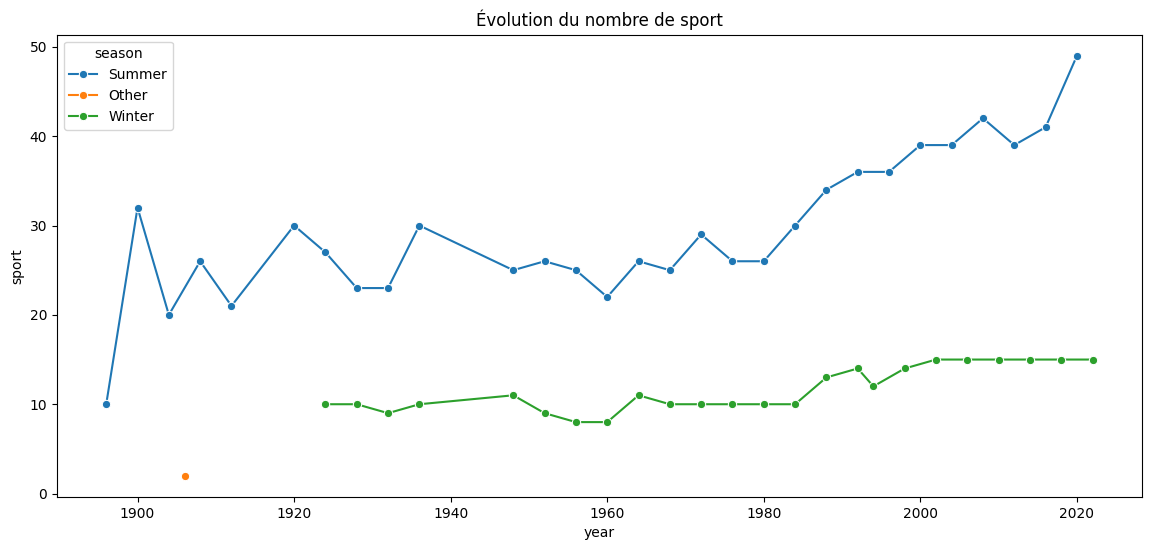

In [6]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_nb_sport,
             x='year', 
             y='sport', 
             hue='season', 
            marker="o", 
)
plt.title("Évolution du nombre de sport")
plt.show()

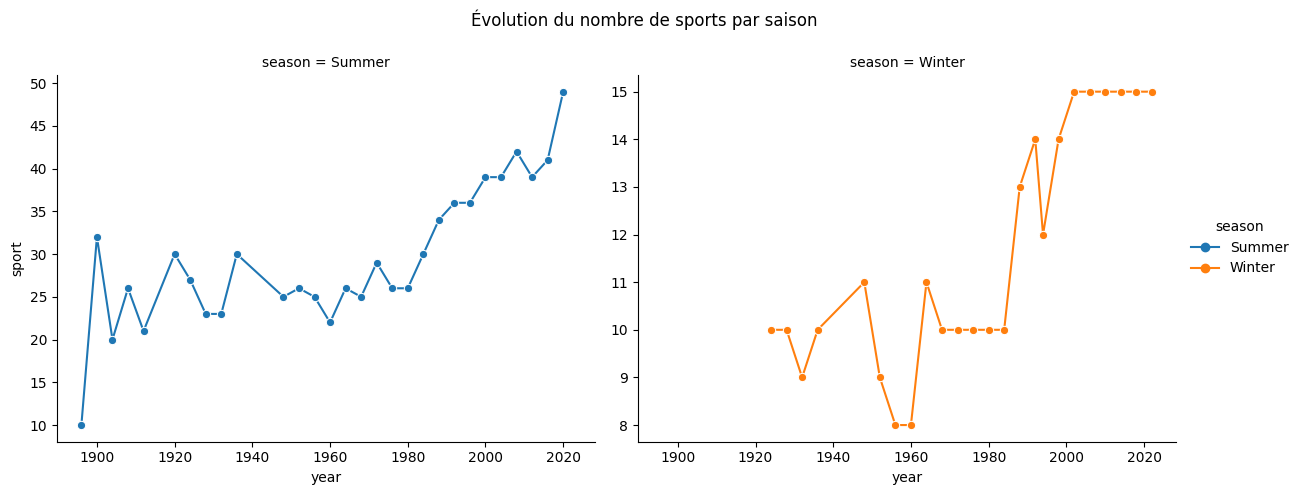

In [7]:
df_filtered = df_nb_sport[df_nb_sport['season'].isin(['Summer', 'Winter'])]

sns.relplot(
    data=df_filtered,
    x='year', 
    y='sport', 
    col='season', # Crée un graphique par saison
    hue='season', 
    kind='line', 
    marker="o", 
    height=5, 
    aspect=1.2,
    facet_kws={'sharey': False}  # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre de sports par saison")
plt.show()

### Evolution du nombre d'epreuves

In [8]:
df_nb_event = df_bio_result_merged.groupby(['year','season'])['event'].nunique().reset_index()
df_nb_event.head(3)

,year,season,event
0,1896,Summer,43
1,1900,Summer,226
2,1904,Summer,164


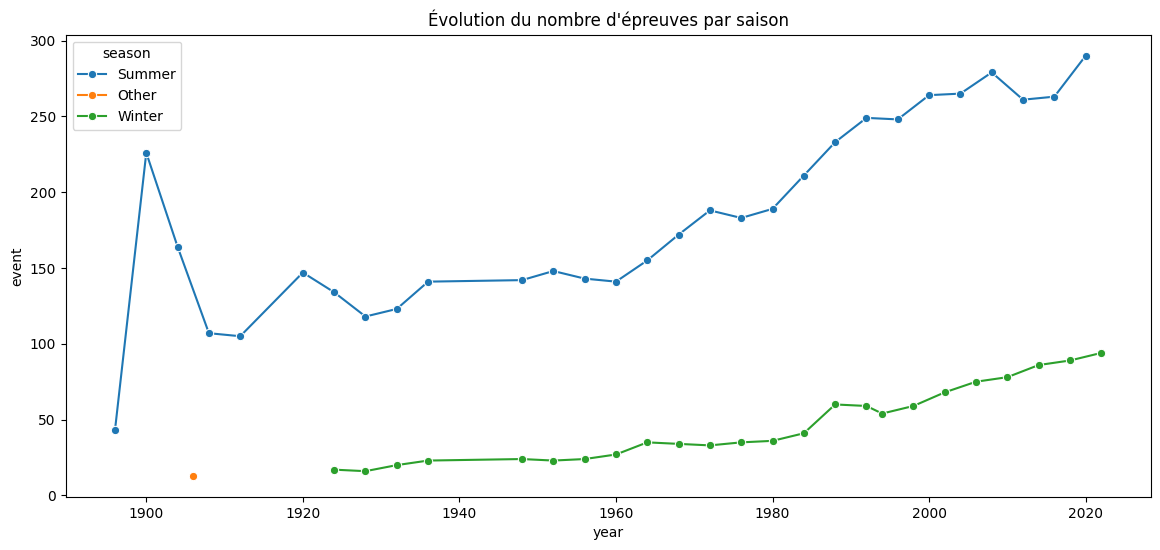

In [9]:
plt.figure(figsize=(14,6))

sns.lineplot(data=df_nb_event,
             x='year',
             y='event',
             hue='season',
             marker="o", 
)

plt.title("Évolution du nombre d'épreuves par saison")
plt.show()

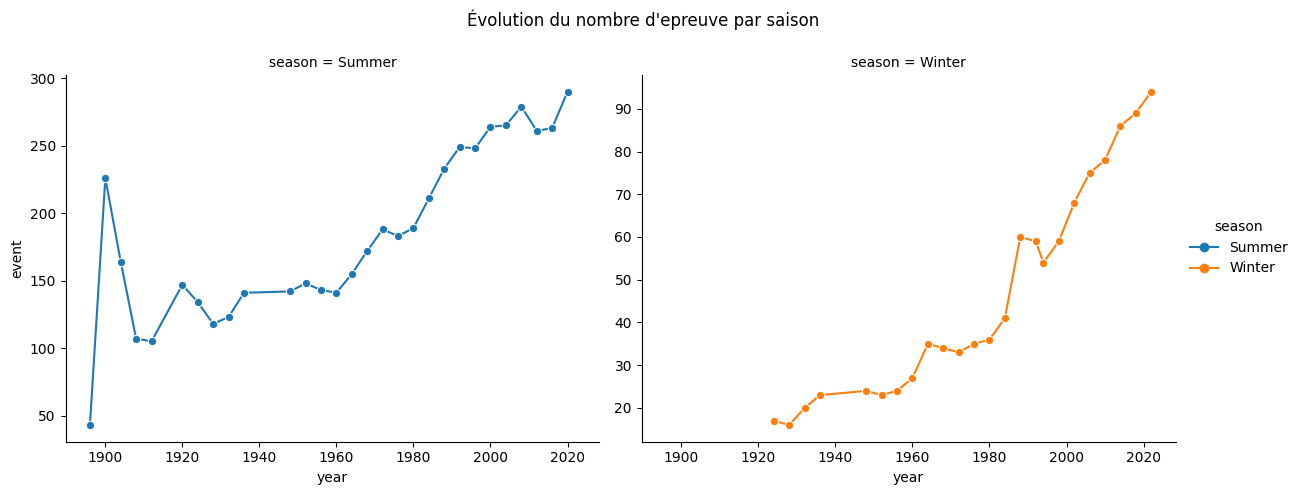

In [10]:
df_filtered = df_nb_event[df_nb_event['season'].isin(['Summer', 'Winter'])]

sns.relplot(
    data=df_filtered,
    x='year', 
    y='event', 
    col='season', # Crée un graphique par saison
    hue='season', 
    kind='line', 
    marker="o", 
    height=5, 
    aspect=1.2,
    facet_kws={'sharey': False}  # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre d'epreuve par saison")
plt.show()

### Répartition des épreuves individuelles et collectives

In [11]:
df_nb_sport_co_indiv = df_bio_result_merged.groupby(['year','season', 'collective_sport'])['event'].nunique().reset_index()
df_nb_sport_co_indiv.head(3)

,year,season,collective_sport,event
0,1896,Summer,Collective,3
1,1896,Summer,Individual,40
2,1900,Summer,Collective,66


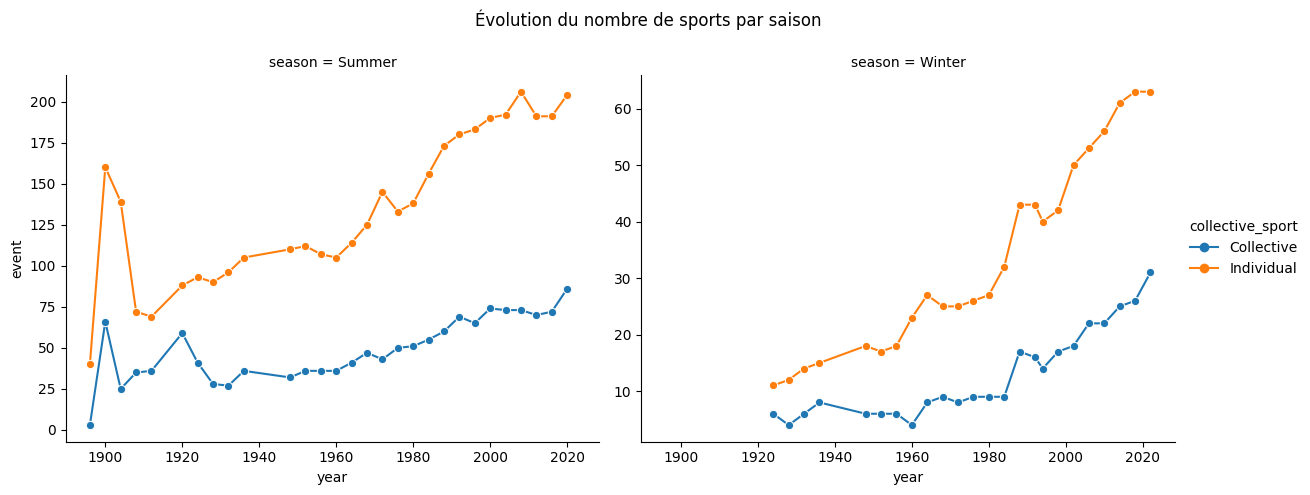

In [12]:
df_filtered = df_nb_sport_co_indiv[df_nb_sport_co_indiv['season'].isin(['Summer', 'Winter'])]

sns.relplot(
    data=df_filtered,
    x='year', 
    y='event', 
    col='season', # Crée un graphique par saison
    hue='collective_sport', 
    kind='line', 
    marker="o", 
    height=5, 
    aspect=1.2,
    facet_kws={'sharey': False}  # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre de sports par saison")
plt.show()

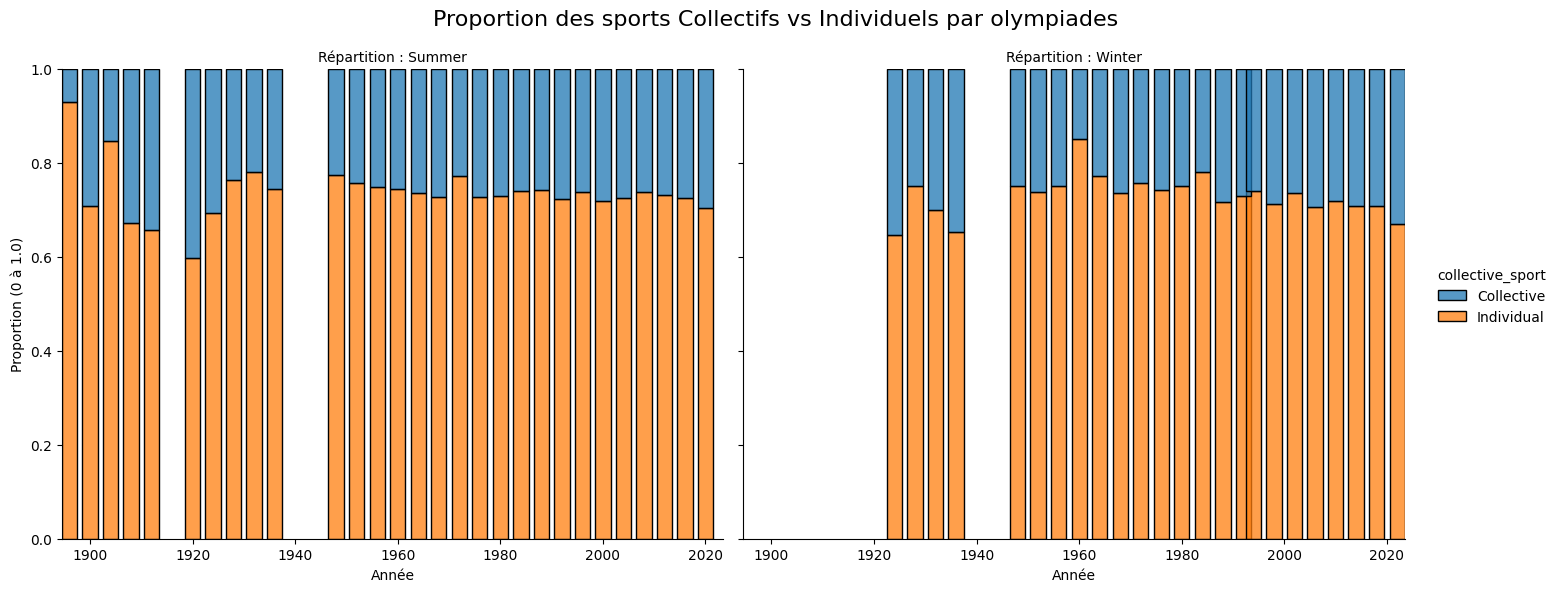

In [13]:
# 2. Utilisation de displot pour le mode "fill" (proportion)
g = sns.displot(
    data=df_filtered,
    x='year',
    weights='event',          # On utilise le nombre de sports comme "poids"
    hue='collective_sport',
    col='season',
    kind='hist',              # On précise qu'on veut un histogramme
    multiple='fill',          # <--- C'est l'option magique pour le 100% empilé
    discrete=True,            # Pour avoir une barre par année
    shrink=3,               # Pour laisser un petit espace entre les barres
    height=6,
    aspect=1.2)

# 3. Cosmétique
g.set_axis_labels("Année", "Proportion (0 à 1.0)")
g.set_titles("Répartition : {col_name}")

# On ajuste le titre général
plt.subplots_adjust(top=0.88)
g.fig.suptitle("Proportion des sports Collectifs vs Individuels par olympiades", fontsize=16)

plt.show()

### Evolution du nombre total de médailles par an

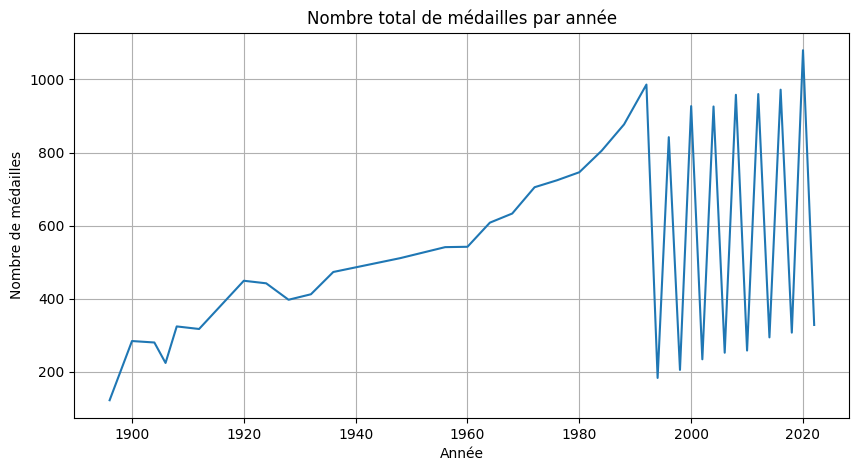

In [14]:
medals = df_medal["total"]

medals_per_year = (
    df_medal
    .groupby("year", as_index=False)["total"]
    .sum()
    .rename(columns={"total": "medal_count"})
)

plt.figure(figsize=(10,5))
plt.plot(medals_per_year["year"], medals_per_year["medal_count"])
plt.title("Nombre total de médailles par année")
plt.xlabel("Année")
plt.ylabel("Nombre de médailles")
plt.grid(True)
plt.show()

### Evolution médailles pour les JO d'été et d'hiver

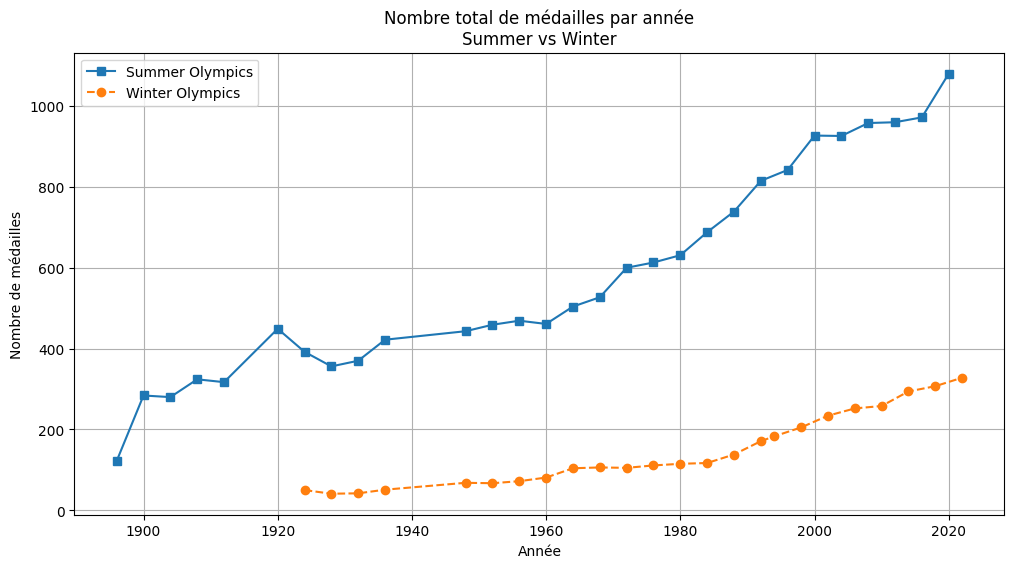

In [15]:
df_medal_season = df_medal.merge(
    df_games[["edition_id", "season"]],
    on="edition_id",
    how="left"
)

medals_per_year_season = (
    df_medal_season
    .groupby(["year", "season"], as_index=False)["total"]
    .sum()
    .rename(columns={"total": "medal_count"})
)

summer_medals = medals_per_year_season[medals_per_year_season["season"] == "Summer"]
winter_medals = medals_per_year_season[medals_per_year_season["season"] == "Winter"]

plt.figure(figsize=(12,6))

plt.plot(
    summer_medals["year"],
    summer_medals["medal_count"],
    marker="s",
    label="Summer Olympics"
)

plt.plot(
    winter_medals["year"],
    winter_medals["medal_count"],
    marker="o",
    linestyle="--",
    label="Winter Olympics"
)

plt.title("Nombre total de médailles par année\nSummer vs Winter")
plt.xlabel("Année")
plt.ylabel("Nombre de médailles")
plt.legend()
plt.grid(True)
plt.show()


### Evolution du nombre de pays participants

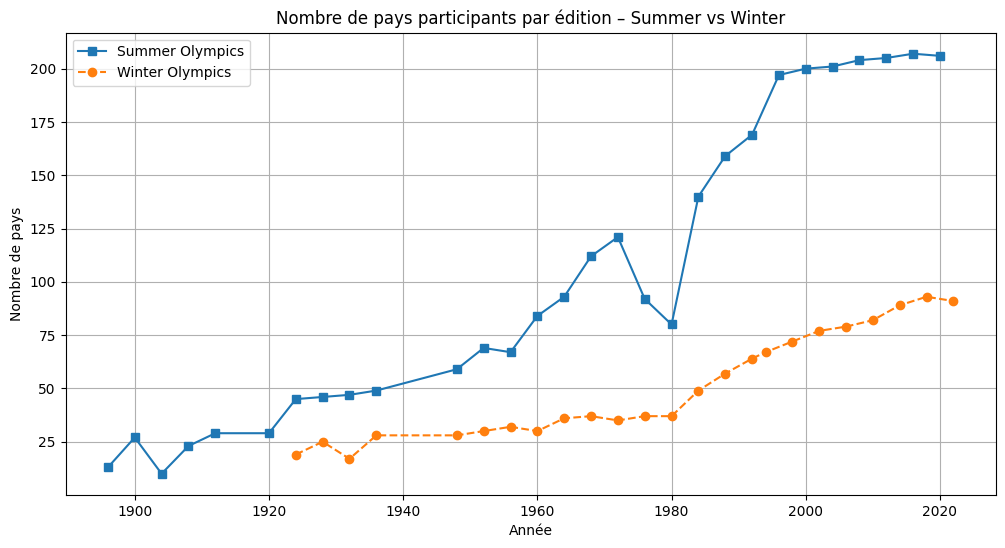

In [16]:
countries_per_edition = (
    df_athlete_result
    .groupby(["edition_id", "edition_year"])["country_noc"]
    .nunique()
    .reset_index(name="num_countries")
)

countries_per_edition = countries_per_edition.merge(
    df_games[["edition_id", "season"]],
    on="edition_id",
    how="left"
)

summer = countries_per_edition[countries_per_edition["season"] == "Summer"]
winter = countries_per_edition[countries_per_edition["season"] == "Winter"]

plt.figure(figsize=(12,6))

plt.plot(
    summer["edition_year"],
    summer["num_countries"],
    marker="s",
    label="Summer Olympics"
)

plt.plot(
    winter["edition_year"],
    winter["num_countries"],
    marker="o",
    linestyle="--",
    label="Winter Olympics"
)

plt.title("Nombre de pays participants par édition – Summer vs Winter")
plt.xlabel("Année")
plt.ylabel("Nombre de pays")
plt.legend()
plt.grid(True)
plt.show()

### Nombre total de médailles par pays

In [17]:
df_medal = df_medal.rename(columns = {'country_noc': 'noc'})

In [18]:
# 1- Identifier la clé de jointure : "noc"
# 2- Selectionner les colonnes nécessaires : "noc" et 'continent 
# 3- Effectuer la jointure avec la fonction merge()

# Créer new df avec les colonnes necessaires pour le merge
# (noc et continent) et supprimer les doublons
df_country_continent = df_country[['noc', 'continent']].drop_duplicates()

# Joindre 
# left merge p
df_medal = df_medal.merge(
    df_country_continent,
    on='noc',
    how='left'
)

# Vérifier le résultat en visualisant le DataFrame 
print(df_medal.head())

                edition  edition_id  year        country  noc  gold  silver  \
0  1896 Summer Olympics           1  1896      Australia  AUS     2       0   
1  1896 Summer Olympics           1  1896        Austria  AUT     2       1   
2  1896 Summer Olympics           1  1896        Denmark  DEN     1       2   
3  1896 Summer Olympics           1  1896         France  FRA     5       4   
4  1896 Summer Olympics           1  1896  Great Britain  GBR     2       3   

   bronze  total continent  
0       0      2   Oceania  
1       2      5    Europe  
2       3      6    Europe  
3       2     11    Europe  
4       2      7    Europe  


In [19]:
#Creation de la palette color code HEX anneaux olympiques 

OLYMPIC_RING_COLOR = {
    'Europe': '#0081c8',
    'Asia': '#fcb131',
    'Africa': '#000000',
    'America': '#ee334e',
    'Oceania': '#00a651',
    'Neutral': 'Lightgray'
}

In [20]:
# Aggrégation total des médailles par pays et continent 
df_aggregated = df_medal.groupby(['country', 'continent'])['total'].sum().reset_index()

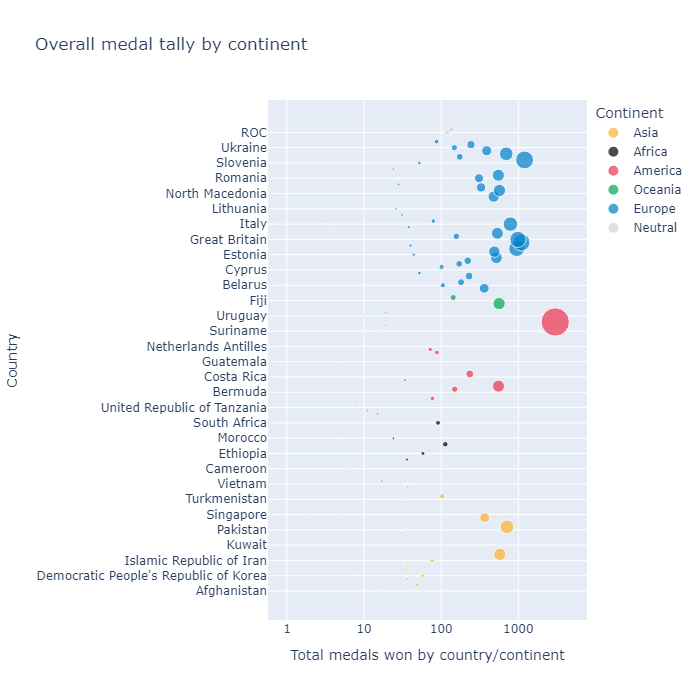

In [21]:
fig = px.scatter(
    df_aggregated,
    x='total',
    y='country',
    color='continent',                  
    color_discrete_map=OLYMPIC_RING_COLOR,   
    size='total',                       
    hover_data=['total'],               
    title='Overall medal tally by continent',
    labels={'total', 'country', 'continent'}
)

fig.update_layout(
    width=700,
    height=700,
    xaxis_title="Total medals won by country/continent",
    yaxis_title="Country",
    legend_title="Continent",
    xaxis_type="log"
)

fig.show()

### Le nombre de partipants au global

In [22]:
df_athlete_result.head(2)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition,sport_event_id,sport_id
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,1889.0,1908.0,19.0,GBR,False,1,1
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,1886.0,1908.0,22.0,GBR,False,2,1


In [23]:
#groupby par athlètes et comptage du nombre d'éditions uniques 
df_athlete_participation = df_athlete_result.groupby('athlete')['edition'].nunique().reset_index(name='participations_count')

In [24]:
#aggrégation
df_participation_summary = df_athlete_participation.groupby('participations_count')['athlete'].count().reset_index(name='athlete_count')
df_participation_summary

,participations_count,athlete_count
0,1,111407
1,2,29725
2,3,9321
3,4,2699
4,5,772
5,6,189
6,7,67
7,8,21
8,9,10
9,10,1


In [25]:
df_participation_summary.rename(columns={
    'participations_count': 'Participation_numbers',
    'athlete_count': 'Athlete_numbers'},
     inplace=True
)
df_participation_summary

,Participation_numbers,Athlete_numbers
0,1,111407
1,2,29725
2,3,9321
3,4,2699
4,5,772
5,6,189
6,7,67
7,8,21
8,9,10
9,10,1


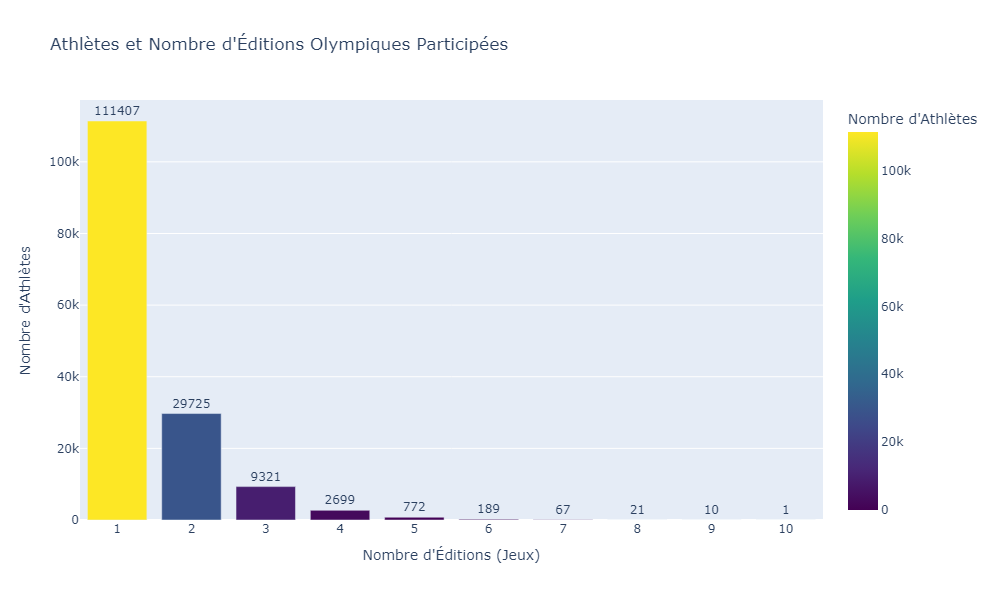

In [26]:
fig = px.bar(
    df_participation_summary,
    x='Participation_numbers', 
    y='Athlete_numbers',
    title="Athlètes et Nombre d'Éditions Olympiques Participées",
    labels={
        'Participation_numbers': "Nombre d'éditions Olympiques (Jeux) Participées", 
        'Athlete_numbers': "Nombre d'Athlètes"
    },
   
    color='Athlete_numbers',
    color_continuous_scale=px.colors.sequential.Viridis 
)

fig.update_layout(
    xaxis_title="Nombre d'Éditions (Jeux)",
    yaxis_title="Nombre d'Athlètes",
    xaxis={'type': 'category'}, 
    width=1000,
    height=600
)

# CORRECTION 2 : Utiliser le nom de colonne correct pour le texte
fig.update_traces(text=df_participation_summary['Athlete_numbers'], textposition='outside')

fig.show()

## 2. Performance des pays

### Le top 10 des pays qui ont récoltés le plus de médailles

<Axes: ylabel='total'>

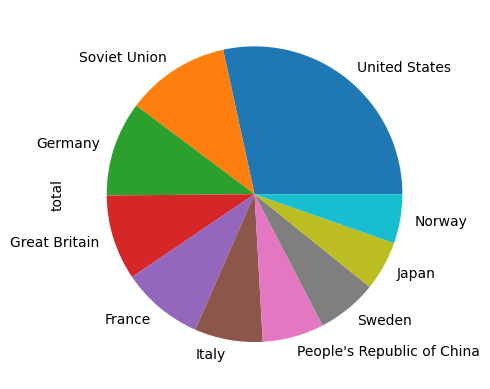

In [27]:
df_medal.sample(3)

country_medals_alltime = df_medal.groupby('country')['total'].sum()
country_medals_alltime.head()

country_medals_top10 = country_medals_alltime.nlargest(10)
country_medals_top10

country_medals_top10.plot.pie()

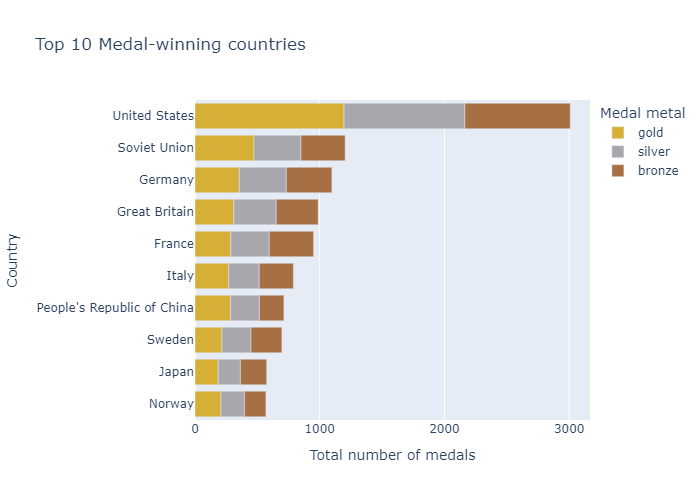

In [28]:
# TOP 10 MEDAL-WINNING COUNTRIES

df_top_countries = df_medal.groupby('country')[['gold', 'silver', 'bronze', 'total']].sum().reset_index()

df_top_10 = df_top_countries.sort_values(by='total', ascending=False).head(10)

# Creation de la color palette : Codes HEX métal médailles

OLYMPIC_MEDAL_COLOR = {
    'gold': '#d6af36',
    'silver': '#a7a7ad',
    'bronze': '#a77044'
}

fig = px.bar(
    df_top_10,
    x=['gold', 'silver', 'bronze'], 
    y='country',                      
    orientation='h',                  # Graphique en barres horizontales
    title='Top 10 Medal-winning countries',
    labels={'value': 'Nombre de Médailles', 'country': 'Pays', 'variable': 'Type de Médaille'},
    color_discrete_map= OLYMPIC_MEDAL_COLOR
)    

fig.update_layout(
    xaxis_title="Total number of medals",
    yaxis_title="Country",
    legend_title="Medal metal",
    # Pour que le Top 10 soit dans l'ordre du plus grand au plus petit (en haut)
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

### La répartition des médailles pour ce top 10

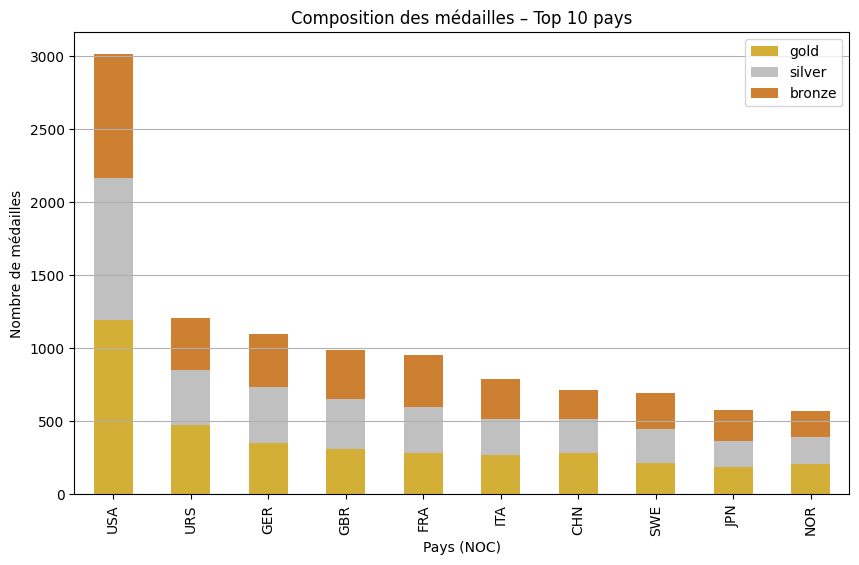

In [29]:
top10_countries = (
    df_medal
    .groupby("noc", as_index=False)["total"]
    .sum()
    .sort_values("total", ascending=False)
    .head(10)["noc"]
)

top10_medals = (
    df_medal[df_medal["noc"].isin(top10_countries)]
    .groupby("noc", as_index=False)
    .sum()
    .set_index("noc")[["gold", "silver", "bronze", "total"]]
)

top10_medals_sorted = top10_medals.sort_values("total", ascending=False)

colors = {
    "gold":   "#D4AF37",
    "silver": "#C0C0C0",
    "bronze": "#CD7F32"
}

top10_medals_sorted[["gold", "silver", "bronze"]].plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)

plt.title("Composition des médailles – Top 10 pays")
plt.xlabel("Pays (NOC)")
plt.ylabel("Nombre de médailles")
plt.grid(axis="y")
plt.show()

### Ratio des pays ayant gagnés au moins une médaille

In [30]:
df_medailles = df_bio_result_merged[df_bio_result_merged['medal'].notna()]

tous_les_pays = set(df_bio_result_merged['country_noc'].unique())
pays_medailles = set(df_medailles['country_noc'].unique())
pays_sans_medailles = tous_les_pays - pays_medailles

print(f"Nombre total de pays ayant participé : {len(tous_les_pays)}")
print(f"Nombre de pays ayant remporté au moins une médaille : {len(pays_medailles)}")
print(f"Nombre de pays n'ayant jamais remporté de médaille : {len(pays_sans_medailles)}")

Nombre total de pays ayant participé : 231
Nombre de pays ayant remporté au moins une médaille : 154
Nombre de pays n'ayant jamais remporté de médaille : 77


In [31]:
print(sorted(list(pays_sans_medailles)))

['ALB', 'AND', 'ANG', 'ANT', 'ARU', 'ASA', 'BAN', 'BEN', 'BHU', 'BIH', 'BIZ', 'BOL', 'BRU', 'CAF', 'CAM', 'CAY', 'CGO', 'CHA', 'COD', 'COK', 'COM', 'COR', 'CPV', 'CRT', 'DMA', 'EOR', 'ESA', 'FSM', 'GAM', 'GBS', 'GEQ', 'GUI', 'GUM', 'HON', 'IVB', 'KIR', 'LAO', 'LBA', 'LBR', 'LCA', 'LES', 'MAD', 'MAL', 'MAW', 'MDV', 'MHL', 'MLI', 'MLT', 'MTN', 'MYA', 'NBO', 'NCA', 'NRU', 'OMA', 'PLE', 'PLW', 'PNG', 'RHO', 'RWA', 'SAA', 'SEY', 'SKN', 'SLE', 'SOL', 'SOM', 'SSD', 'STP', 'SWZ', 'TLS', 'TUV', 'UNK', 'VAN', 'VIN', 'VNM', 'YAR', 'YEM', 'YMD']


In [32]:
data_medal_ratio = {
    'Statut':['Pays Médaillés', 'Pays non médaillés'],
    'Nombre de Pays':[len(pays_medailles), len(pays_sans_medailles)]
}

df_medal_ratio = pd.DataFrame(data_medal_ratio)

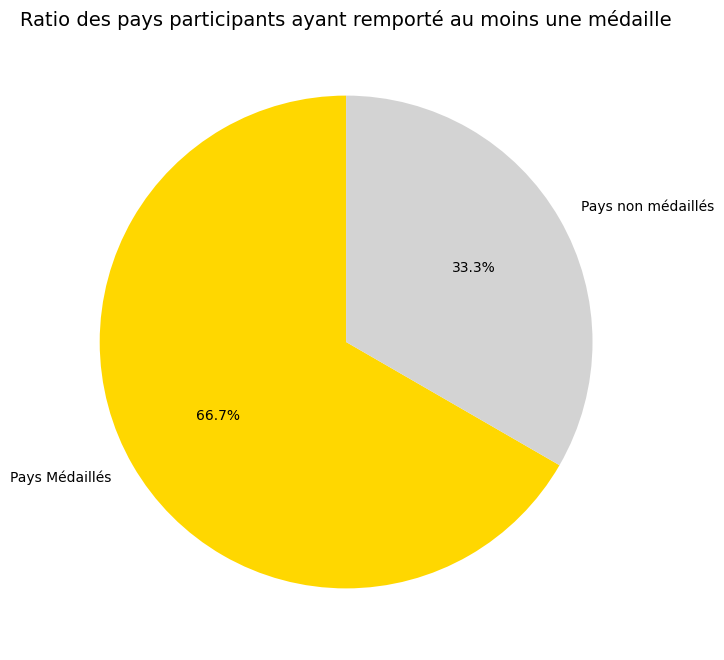

In [33]:
# Configuration de la figure
plt.figure(figsize=(8, 8))

# Création du diagramme circulaire
plt.pie(
    df_medal_ratio['Nombre de Pays'],
    labels=df_medal_ratio['Statut'],
    autopct='%1.1f%%',  
    startangle=90,      
    colors=['gold', 'lightgrey']
)

plt.title('Ratio des pays participants ayant remporté au moins une médaille', fontsize=14)

plt.show()

### Top 20 des pays les plus médaillés dans les sports individuels

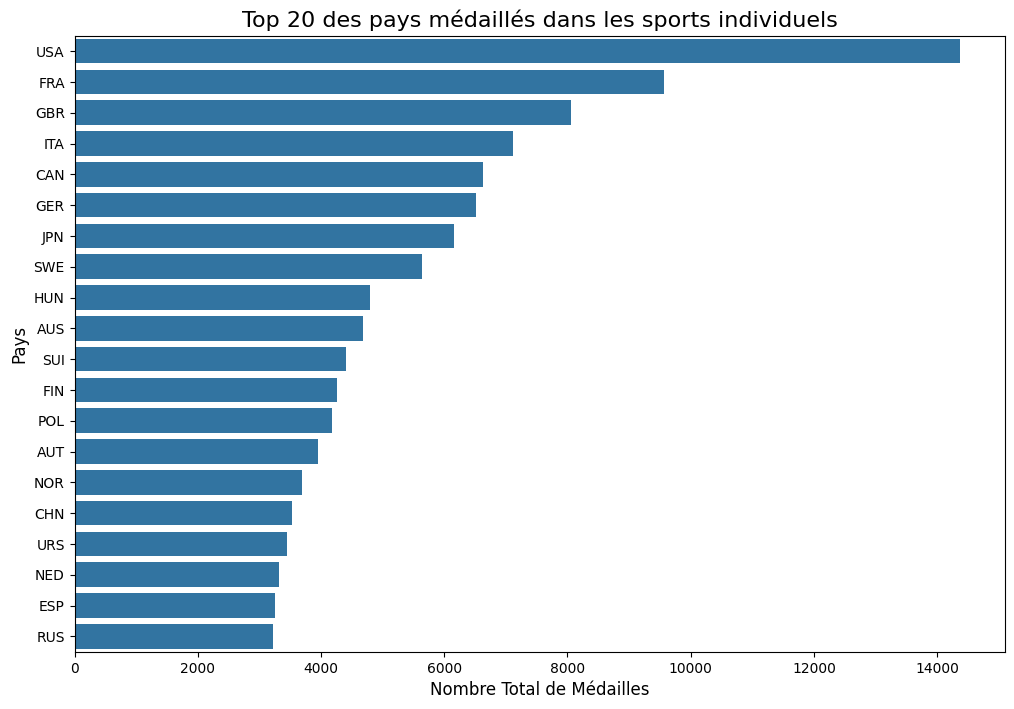

In [34]:
df_individual_sport = df_bio_result_merged[df_bio_result_merged['collective_sport'] == 'Individual']

df_medailles_individual = df_individual_sport[df_individual_sport['medal'] != 'nan']

resultat_medailles_indiv_country = df_medailles_individual.groupby('country_noc').size().reset_index(name='nombre_de_medailles_indiv_par_pays')

top20_resultat_medailles_indiv_country = resultat_medailles_indiv_country.nlargest(20, columns="nombre_de_medailles_indiv_par_pays")

plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

sns.barplot(
    x="nombre_de_medailles_indiv_par_pays", # La longueur des barres (l'axe des x)
    y='country_noc',              # Les catégories (l'axe des y)
    data=top20_resultat_medailles_indiv_country
)

plt.title("Top 20 des pays médaillés dans les sports individuels", fontsize=16)
plt.xlabel("Nombre Total de Médailles", fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.show()

### Top 30 pays: répartion des médailles individuels et collectives

In [35]:
df_collective_sport = df_bio_result_merged[(df_bio_result_merged['collective_sport'] == 'Collective')]

df_collective_sport_medals = df_collective_sport[df_collective_sport['medal'] != 'nan']

df_medailles_collectives_unique = df_collective_sport_medals.groupby(['edition_id','sport', 'event', 'country_noc', 'medal']).size().reset_index(name='compte_medaille_athletes')

resultat_medailles_collectives = df_medailles_collectives_unique.groupby(
    ['country_noc', 'event', 'sport']
).size().reset_index(name='nombre_total_de_medailles_collectives')

resultat_medailles_collectives_par_pays = resultat_medailles_collectives.groupby('country_noc').sum()
resume_medailles_collectives_par_pays = resultat_medailles_collectives_par_pays.drop(columns=['event', 'sport'], axis=1)

#Fusionner les deux DataFrames sur la colonne du code pays
df_medailles_combinees = pd.merge(
    resume_medailles_collectives_par_pays,
    resultat_medailles_indiv_country,
    on='country_noc',
    how='outer'
)

df_medailles_combinees['nombre_total_de_medailles_collectives'] = df_medailles_combinees['nombre_total_de_medailles_collectives'].astype('Int64')
df_medailles_combinees['nombre_de_medailles_indiv_par_pays'] = df_medailles_combinees['nombre_de_medailles_indiv_par_pays'].astype('Int64')

In [36]:
df_plot = df_medailles_combinees.copy()
df_plot['Total'] = df_plot['nombre_total_de_medailles_collectives'] + df_plot['nombre_de_medailles_indiv_par_pays']

df_plot.rename(columns={
    'nombre_total_de_medailles_collectives': 'Collectives', 
    'nombre_de_medailles_indiv_par_pays': 'Individuelles'
}, inplace=True)

df_top_pays_empile = df_plot.sort_values(by='Total', ascending=False).head(30) 

df_plot_long = pd.melt(
    df_top_pays_empile,
    id_vars=['country_noc'],
    value_vars=['Individuelles', 'Collectives'],
    var_name='Type_Medaille',
    value_name='Nombre_Medaille'
)
df_plot_long = df_plot_long.sort_values(by='country_noc', ascending=False)

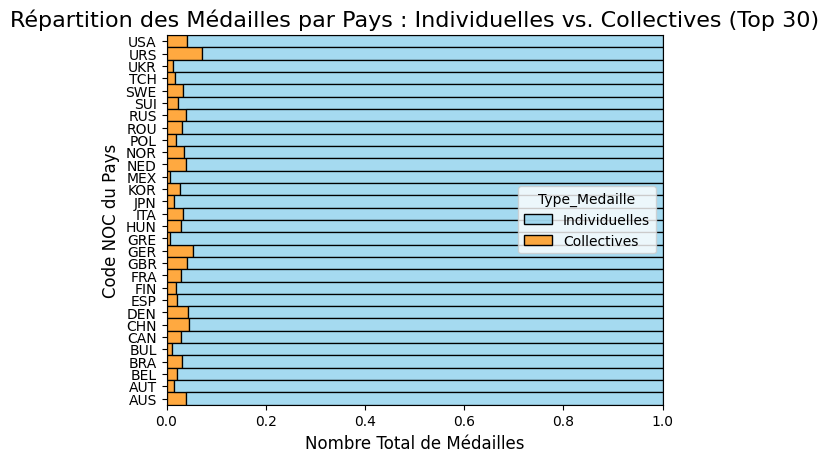

In [37]:
sns.histplot(
    data=df_plot_long,
    y='country_noc',
    weights='Nombre_Medaille', 
    hue='Type_Medaille',
    multiple='fill',
    palette={'Individuelles': 'skyblue', 'Collectives': 'darkorange'},
    edgecolor='black'
)

plt.title(
    'Répartition des Médailles par Pays : Individuelles vs. Collectives (Top 30)',
    fontsize=16
)
plt.xlabel('Nombre Total de Médailles', fontsize=12)
plt.ylabel('Code NOC du Pays', fontsize=12)

plt.show()

### TOP 5 des pays les plus médaillés par continent

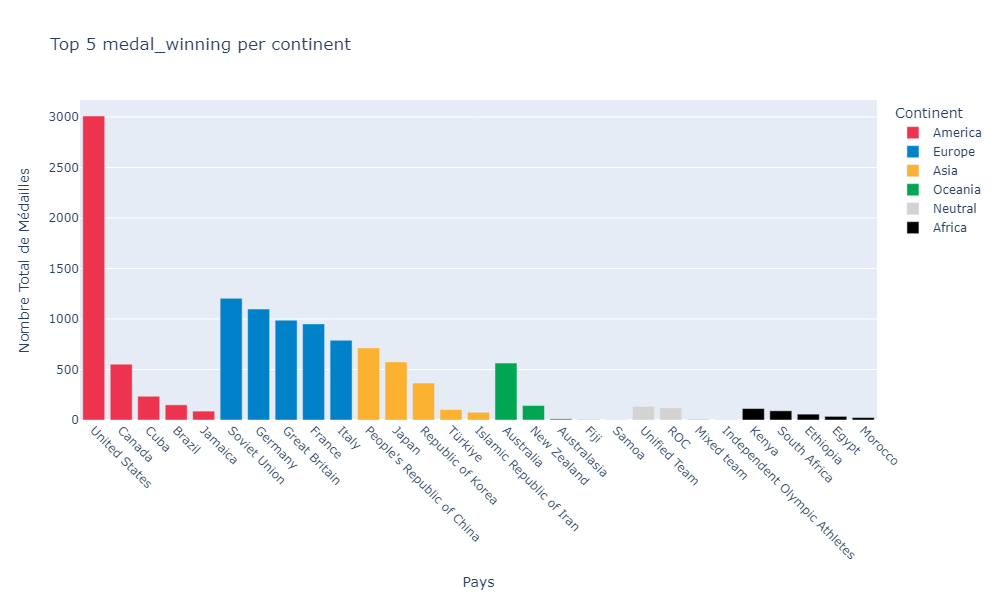

In [38]:
df_aggregated_sorted = df_aggregated.sort_values(by='total', ascending=False)

# Limiter au 5 premiers de chaque continent
df_top_5_per_continent = df_aggregated_sorted.groupby('continent').head(5)


fig = px.bar(
    df_top_5_per_continent,
    x='country',                      
    y='total',                        
    color='continent',                # Couleur basée sur le continent
    color_discrete_map=OLYMPIC_RING_COLOR,
    title='Top 5 medal_winning per continent',
    labels={'total': 'Nombre Total de Médailles', 'country': 'Pays', 'continent': 'Continent'}
)

fig.update_layout(
    xaxis_title="Pays",
    yaxis_title="Nombre Total de Médailles",
    legend_title="Continent",
    width=1000,
    height=600
)

fig.update_xaxes(tickangle=45)

fig.show()

### Distribution nombre total de médailles par continent

In [39]:
df_continent_totals = df_aggregated.groupby('continent')['total'].sum().reset_index()

In [40]:
#trier par total
df_continent_totals = df_continent_totals.sort_values(by='total', ascending=False)

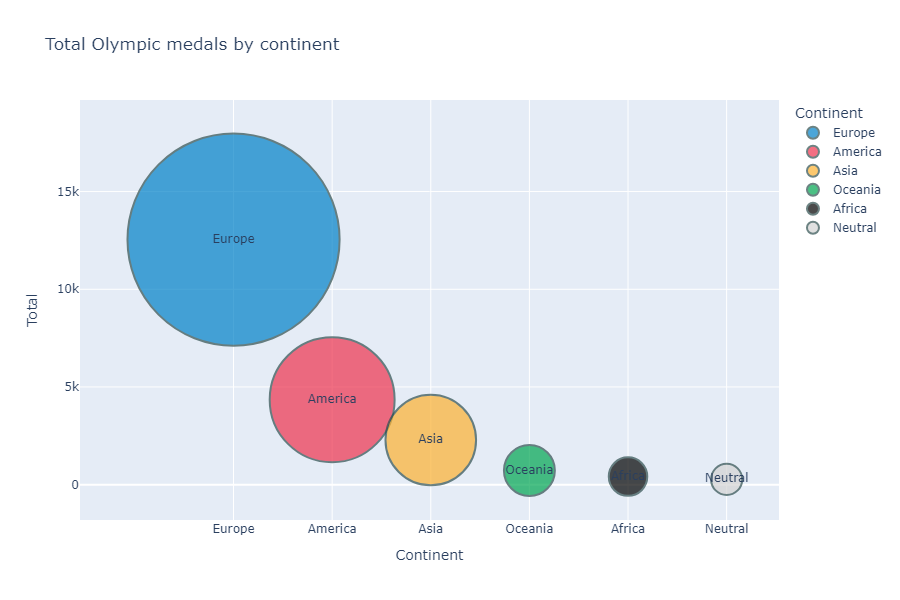

In [41]:
fig = px.scatter(
    df_continent_totals,
    x='continent',                     
    y='total',                         
    size='total',                      # La taille de la bulle est proportionnelle au total
    color='continent',                 # La couleur basée sur le continent
    color_discrete_map=OLYMPIC_RING_COLOR, 
    hover_name='continent',            
    text='continent',                  # Affiche le nom du continent DANS la bulle
    size_max=150,                      
    title='Total Olympic medals by continent'
)

fig.update_layout(
    xaxis_title="Continent",
    yaxis_title="Total",
    legend_title="Continent",
    width=900,
    height=600,
)

fig.update_traces(
    textposition='middle center',       
    marker=dict(line=dict(width=2, color='DarkSlateGrey')), 
    mode='markers+text'                 
)

fig.show()

## 3. Médailles : structure & répartition

### Répartition globale des médailles par type

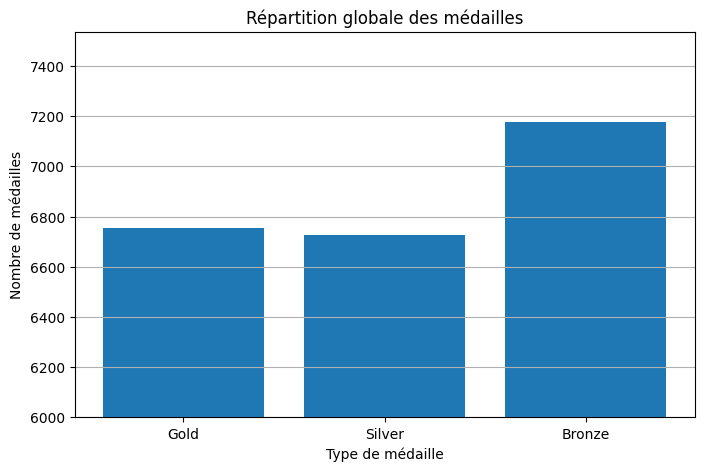

In [42]:
medals_by_type = pd.DataFrame({
    "medal": ["Gold", "Silver", "Bronze"],
    "count": [
        df_medal["gold"].sum(),
        df_medal["silver"].sum(),
        df_medal["bronze"].sum()
    ]
})

plt.figure(figsize=(8,5))
plt.bar(medals_by_type["medal"], medals_by_type["count"])
plt.title("Répartition globale des médailles")
plt.xlabel("Type de médaille")
plt.ylabel("Nombre de médailles")
plt.ylim(6000, None)
plt.grid(axis="y")

### Les athlètes les plus médaillés de l’histoire

In [43]:
df_medal

,edition,edition_id,year,country,noc,gold,silver,bronze,total,continent
0,1896 Summer Olympics,1,1896,Australia,AUS,2,0,0,2,Oceania
1,1896 Summer Olympics,1,1896,Austria,AUT,2,1,2,5,Europe
2,1896 Summer Olympics,1,1896,Denmark,DEN,1,2,3,6,Europe
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11,Europe
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7,Europe
...,...,...,...,...,...,...,...,...,...,...
1796,2022 Winter Olympics,62,2022,Switzerland,SUI,7,2,6,15,Europe
1797,2022 Winter Olympics,62,2022,Slovakia,SVK,1,0,1,2,NaN
1798,2022 Winter Olympics,62,2022,Sweden,SWE,8,5,5,18,Europe
1799,2022 Winter Olympics,62,2022,Ukraine,UKR,0,1,0,1,Europe


In [44]:
medals_countrys_per_edition = df_medal.groupby(['year', 'noc'])['total'].sum()

jo_attribution = df_games['country_noc'].value_counts()

df_bio_result_merged['medal'].value_counts()

## Prise en compte des seules lignes "gold", "silver", "bronze".
df_medailles = df_bio_result_merged[df_bio_result_merged['medal'] != 'nan']

## Utilisation de la méthode .size pour compter les lignes de chaque athlète.
resultat_medailles = df_medailles.groupby('athlete').size().reset_index(name='nombre_de_medailles')

## Méthode pour avoir le Top 20 des athlètes ayant obtenu une médaille.
top_20_medals = resultat_medailles.nlargest(20, columns='nombre_de_medailles') 

### Top 20 des athletes les plus médaillés

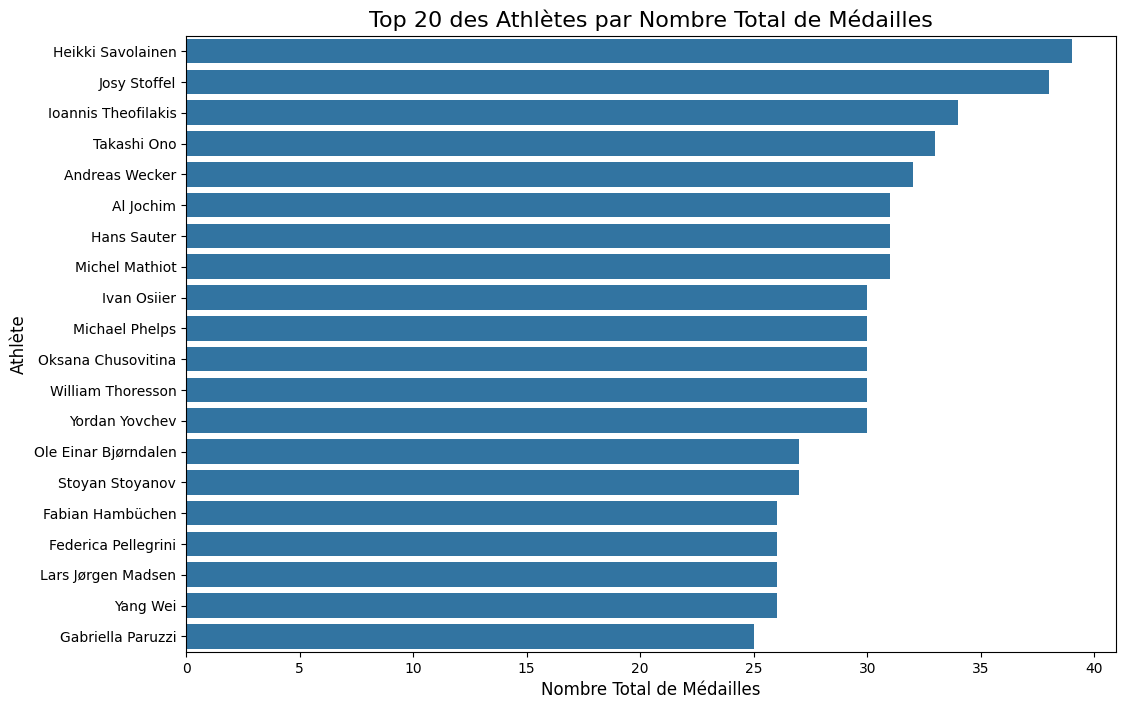

In [45]:
plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

# 3. Créer le diagramme à barres horizontales
sns.barplot(
    x='nombre_de_medailles', # La longueur des barres (l'axe des x)
    y='athlete',              # Les catégories (l'axe des y)
    data=top_20_medals
)

# 4. Ajouter les titres et étiquettes pour la clarté
plt.title('Top 20 des Athlètes par Nombre Total de Médailles', fontsize=16)
plt.xlabel('Nombre Total de Médailles', fontsize=12)
plt.ylabel('Athlète', fontsize=12)

plt.show()

### Top 20 des athletes les plus titrés

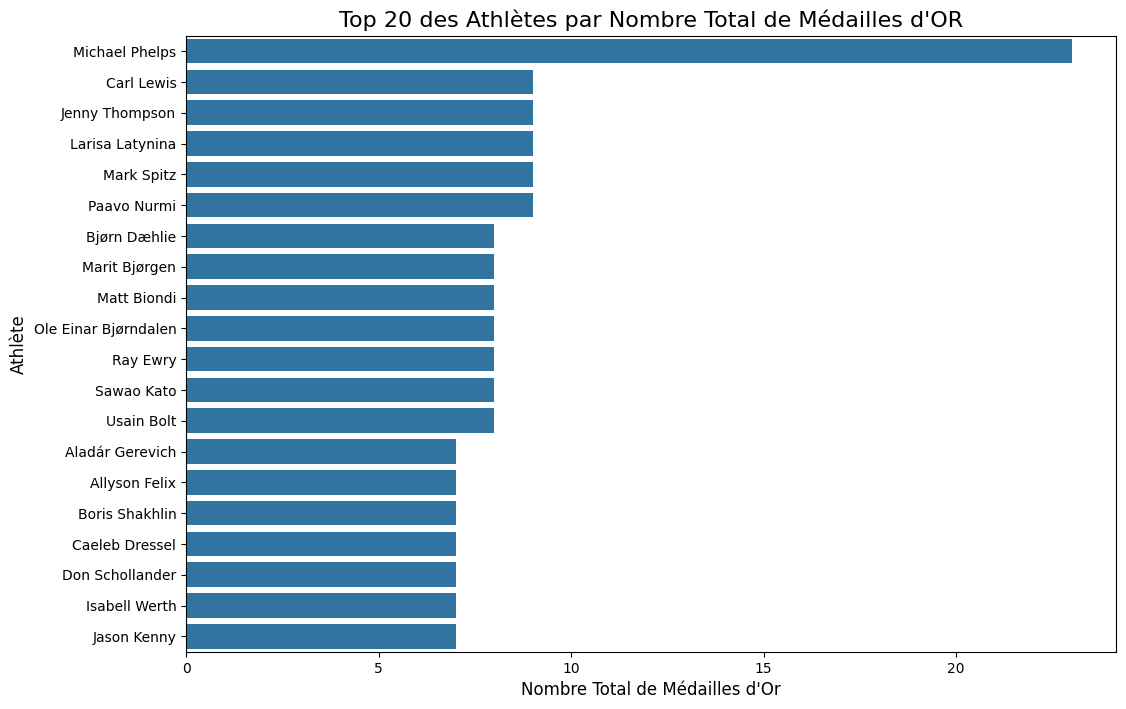

In [46]:
df_gold_medal = df_bio_result_merged[df_bio_result_merged['medal'] == 'Gold']

gold_medal_only = df_gold_medal.groupby('athlete').size().reset_index(name="nombre_de_medailles_d'or")

top20_gold_medal_only = gold_medal_only.nlargest(20, columns="nombre_de_medailles_d'or")

plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

sns.barplot(
    x="nombre_de_medailles_d'or", # La longueur des barres (l'axe des x)
    y='athlete',              # Les catégories (l'axe des y)
    data=top20_gold_medal_only
)

plt.title("Top 20 des Athlètes par Nombre Total de Médailles d'OR", fontsize=16)
plt.xlabel("Nombre Total de Médailles d'Or", fontsize=12)
plt.ylabel('Athlète', fontsize=12)
plt.show()

### Top 20 des athletes français les plus médaillés

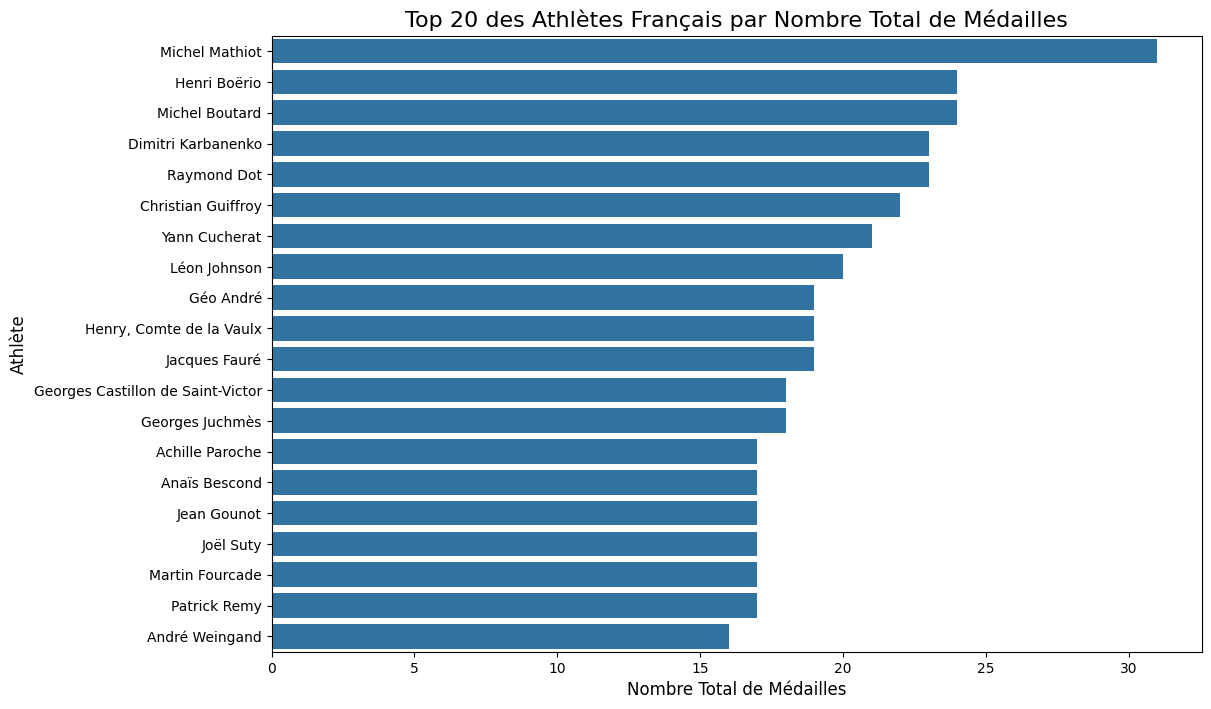

In [47]:
# Filtrer pour obtenir uniquement les médailles remportées par la France
df_medailles_france = df_bio_result_merged[
    (df_bio_result_merged['medal'] != 'nan') & 
    (df_bio_result_merged['country_noc'] == 'FRA')
]

# Grouper par athlète et compter le nombre de médailles
resultat_medailles_france = df_medailles_france.groupby('athlete').size().reset_index(name='nombre_de_medailles')

top_20_medals_fra = resultat_medailles_france.nlargest(20, columns = 'nombre_de_medailles')

plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

sns.barplot(
    x='nombre_de_medailles', # La longueur des barres (l'axe des x)
    y='athlete',              # Les catégories (l'axe des y)
    data=top_20_medals_fra         # Une palette de couleurs (peut être changée)
)

plt.title('Top 20 des Athlètes Français par Nombre Total de Médailles', fontsize=16)
plt.xlabel('Nombre Total de Médailles', fontsize=12)
plt.ylabel('Athlète', fontsize=12)

plt.show()

### Top 20 des athletes français les plus titrés

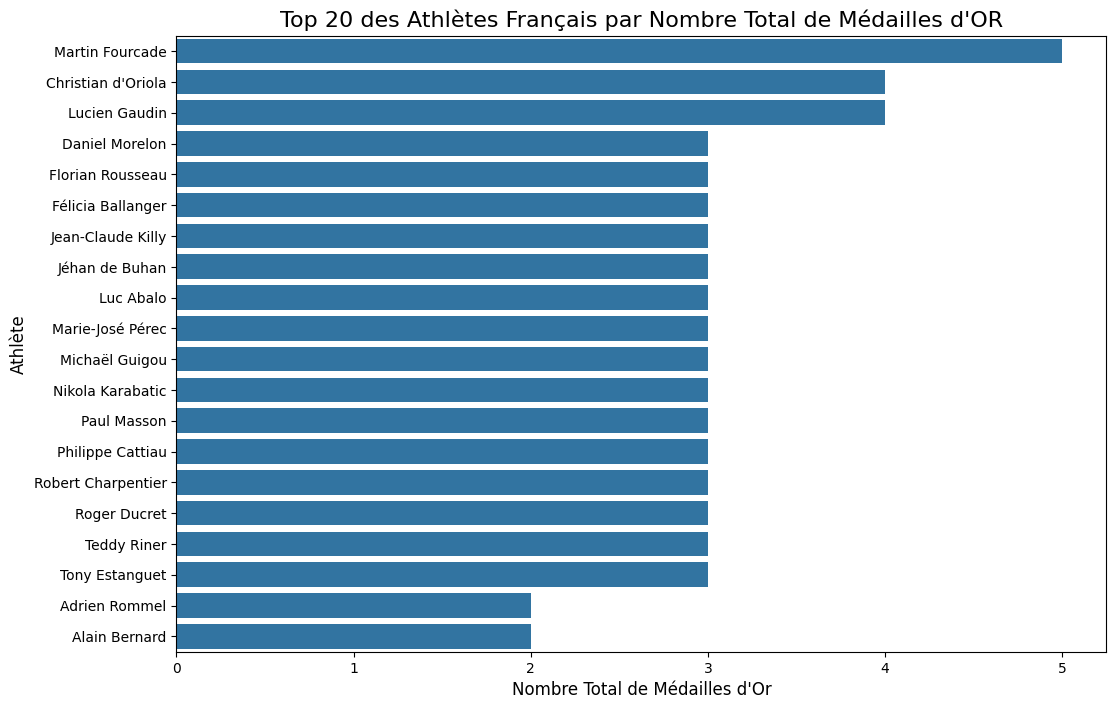

In [48]:
df_gold_medal_fra = df_bio_result_merged[(df_bio_result_merged['medal'] == 'Gold') & (df_bio_result_merged['country_noc'] == 'FRA')]

gold_medal_only_fra = df_gold_medal_fra.groupby('athlete').size().reset_index(name="nombre_de_medailles_d'or")

top20_gold_medal_only_fra = gold_medal_only_fra.nlargest(20, columns="nombre_de_medailles_d'or")

plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

sns.barplot(
    x="nombre_de_medailles_d'or", # La longueur des barres (l'axe des x)
    y='athlete',              # Les catégories (l'axe des y)
    data=top20_gold_medal_only_fra
)

plt.title("Top 20 des Athlètes Français par Nombre Total de Médailles d'OR", fontsize=16)
plt.xlabel("Nombre Total de Médailles d'Or", fontsize=12)
plt.ylabel('Athlète', fontsize=12)
plt.show()

## 4. Les athlètes

### Distribution du nombre d’éditions disputées par athlète

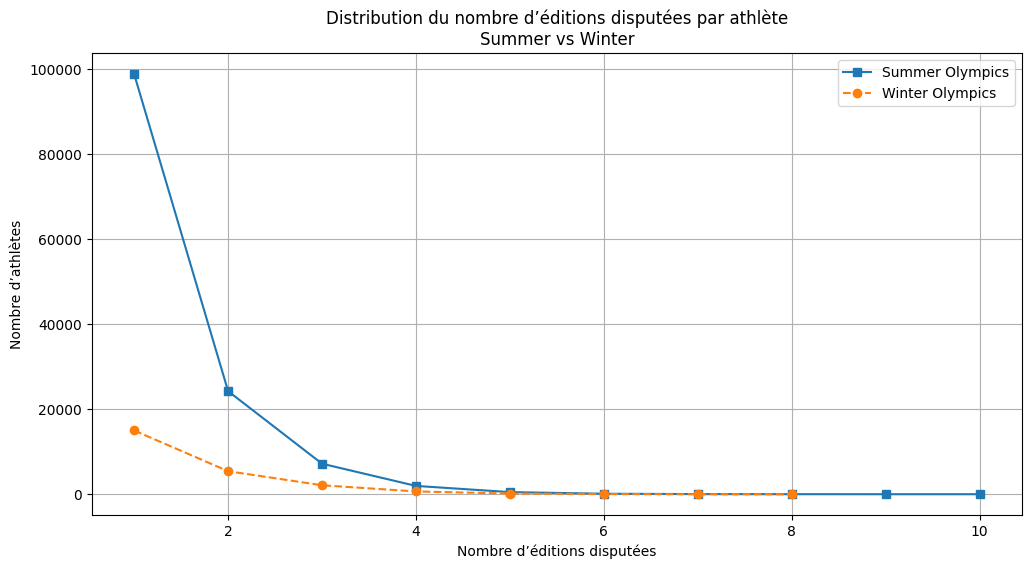

In [49]:
df_age = df_athlete_result.merge(
    df_games[["edition_id", "season"]],
    on="edition_id",
    how="left"
)

editions_per_athlete = (
    df_age
    .groupby(["athlete_id", "season"])["edition_id"]
    .nunique()
    .reset_index(name="num_editions")
)

distribution = (
    editions_per_athlete
    .groupby(["season", "num_editions"])
    .size()
    .reset_index(name="num_athletes")
)

summer_dist = distribution[distribution["season"] == "Summer"]
winter_dist = distribution[distribution["season"] == "Winter"]

plt.figure(figsize=(12,6))

plt.plot(
    summer_dist["num_editions"],
    summer_dist["num_athletes"],
    marker="s",
    label="Summer Olympics"
)

plt.plot(
    winter_dist["num_editions"],
    winter_dist["num_athletes"],
    marker="o",
    linestyle="--",
    label="Winter Olympics"
)

plt.title("Distribution du nombre d’éditions disputées par athlète\nSummer vs Winter")
plt.xlabel("Nombre d’éditions disputées")
plt.ylabel("Nombre d’athlètes")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\maxbr\AppData\Local\Temp\ipykernel_9312\161454789.py:7: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

C:\Users\maxbr\AppData\Local\Temp\ipykernel_9312\161454789.py:7: FutureWarning:



The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.




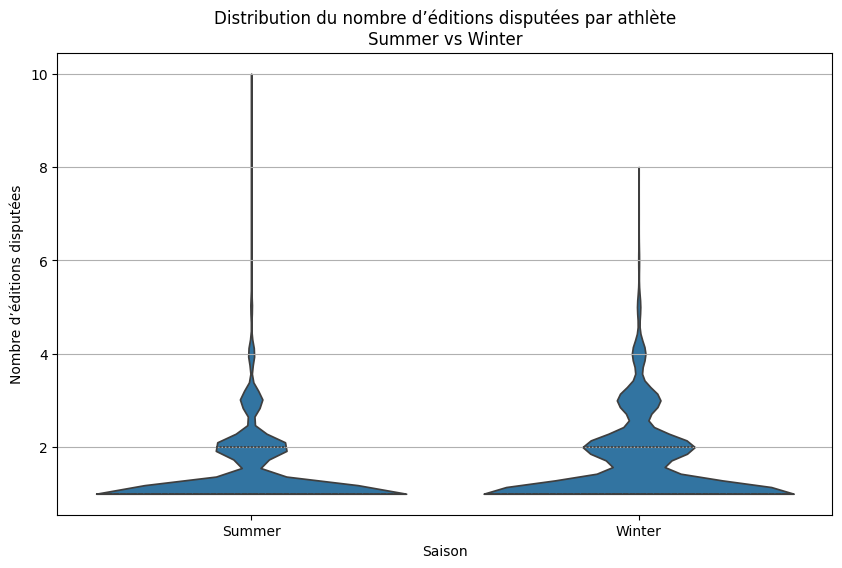

In [50]:
violin_data = editions_per_athlete[
    editions_per_athlete["season"].isin(["Summer", "Winter"])
]

plt.figure(figsize=(10,6))

sns.violinplot(
    data=violin_data,
    x="season",
    y="num_editions",
    inner="quartile",
    cut=0,
    bw=0.3,          # 🔑 réduit fortement le lissage
    scale="width",
    gridsize=50     # 🔑 meilleure continuité verticale
)

plt.title("Distribution du nombre d’éditions disputées par athlète\nSummer vs Winter")
plt.xlabel("Saison")
plt.ylabel("Nombre d’éditions disputées")
plt.grid(axis="y")
plt.show()

### Evolution de la proportion hommes/femmes

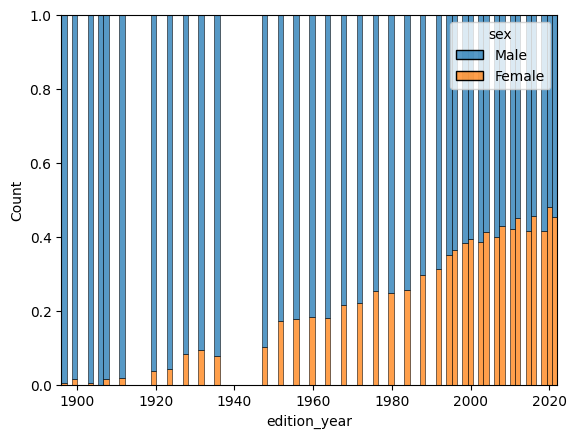

In [51]:
sns.histplot(
    df_bio_result_merged, 
    x = 'edition_year',
    hue = 'sex', 
    multiple='fill'
);

### Âge moyen des athletes par edition

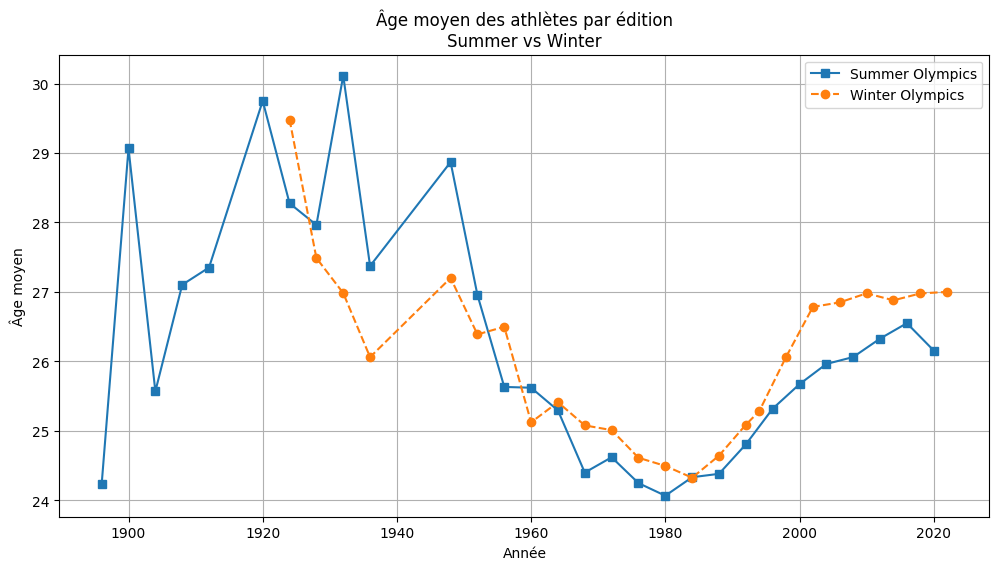

In [52]:
avg_age_year_season = (
    df_age
    .dropna(subset=["age"])
    .groupby(["edition_year", "season"], as_index=False)["age"]
    .mean()
)

summer_age = avg_age_year_season[avg_age_year_season["season"] == "Summer"]
winter_age = avg_age_year_season[avg_age_year_season["season"] == "Winter"]


plt.figure(figsize=(12,6))

plt.plot(
    summer_age["edition_year"],
    summer_age["age"],
    marker="s",
    label="Summer Olympics"
)

plt.plot(
    winter_age["edition_year"],
    winter_age["age"],
    marker="o",
    linestyle="--",
    label="Winter Olympics"
)

plt.title("Âge moyen des athlètes par édition\nSummer vs Winter")
plt.xlabel("Année")
plt.ylabel("Âge moyen")
plt.legend()
plt.grid(True)
plt.show()


### Distribution tailles moyennes des athletes par sexe et saison

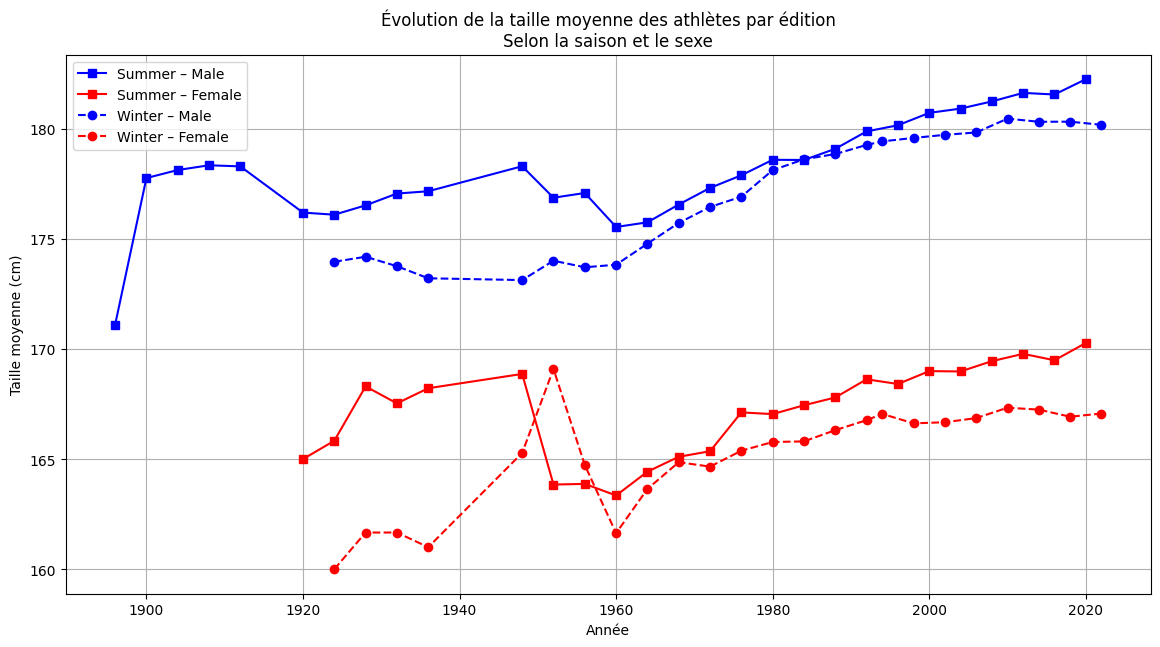

In [53]:
df_morpho = (
    df_athlete_result
    .merge(
        df_bio[["athlete_id", "sex", "height", "weight"]],
        on="athlete_id",
        how="left"
    )
    .merge(
        df_games[["edition_id", "season"]],
        on="edition_id",
        how="left"
    )
)

df_morpho_clean = df_morpho.dropna(subset=["height", "sex"])

avg_height = (
    df_morpho_clean
    .groupby(["edition_year", "season", "sex"], as_index=False)["height"]
    .mean()
)

plt.figure(figsize=(14,7))

marker_map = {
    "Summer": "s",
    "Winter": "o"
}

linestyle_map = {
    "Summer": "-",
    "Winter": "--"
}

color_map = {
    "Male": "blue",
    "Female": "red"
}

for season in ["Summer", "Winter"]:
    for sex in ["Male", "Female"]:
        subset = avg_height[
            (avg_height["season"] == season) &
            (avg_height["sex"] == sex)
        ]
        if not subset.empty:
            plt.plot(
                subset["edition_year"],
                subset["height"],
                marker=marker_map[season],
                linestyle=linestyle_map[season],
                color=color_map[sex],
                label=f"{season} – {sex}"
            )

plt.title("Évolution de la taille moyenne des athlètes par édition\nSelon la saison et le sexe")
plt.xlabel("Année")
plt.ylabel("Taille moyenne (cm)")
plt.legend()
plt.grid(True)
plt.show()

### Profil type du participant

In [54]:
df_bio_result_merged.sample(2)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
143082,2006 Winter Olympics,49,GER,Ski Jumping,"Large Hill, Team, Men",2471,Michael Uhrmann,101137,4,NaN,...,181.0,64.0,19.535423,10.793052,Winter,2006,Sport without weight category,Winter,Collective,Men
24720,1980 Summer Olympics,20,GDR,Rowing,"Coxless Fours, Men",158831,Siegfried Brietzke,37580,1,Gold,...,192.0,90.0,24.414062,12.715658,Summer,1980,Sport without weight category,Summer,Collective,Men


In [55]:
profil_type = df_bio_result_merged.groupby(['sport_event_id','sport','event'])[['height', 'weight',	'age',	'imc',	'ip']].mean().reset_index()
profil_type.sample(2)

,sport_event_id,sport,event,height,weight,age,imc,ip
1019,1020,Skijoring,"Ski Joring, Men",NaN,NaN,21.000000,NaN,NaN
788,789,Wrestling,"Unlimited Class, Greco-Roman, Men",173.5,86.0,24.333333,28.273995,16.382485


In [56]:
# On trouve l'index de la ligne avec l'IMC min et max
idx_min = profil_type['imc'].idxmin()
idx_max = profil_type['imc'].idxmax()

# On affiche ces deux lignes uniquement
resultat_extremes = profil_type.loc[[idx_min, idx_max]]

resultat_extremes

,sport_event_id,sport,event,height,weight,age,imc,ip
249,250,Rhythmic Gymnastics,"Individual, Women",165.996212,47.666667,19.461538,17.271299,10.414178
94,95,Weightlifting,"Super-Heavyweight, Men",184.575130,134.195652,27.076190,39.627730,21.562699


In [57]:
resultat_extremes_long = resultat_extremes.melt(
    id_vars=['sport_event_id','sport','event'],
    value_vars=['height', 'weight',	'age',	'imc',	'ip'],
    var_name='attribut',
    value_name='valeur'
)

resultat_extremes_long.head(4)

,sport_event_id,sport,event,attribut,valeur
0,250,Rhythmic Gymnastics,"Individual, Women",height,165.996212
1,95,Weightlifting,"Super-Heavyweight, Men",height,184.575130
2,250,Rhythmic Gymnastics,"Individual, Women",weight,47.666667
3,95,Weightlifting,"Super-Heavyweight, Men",weight,134.195652


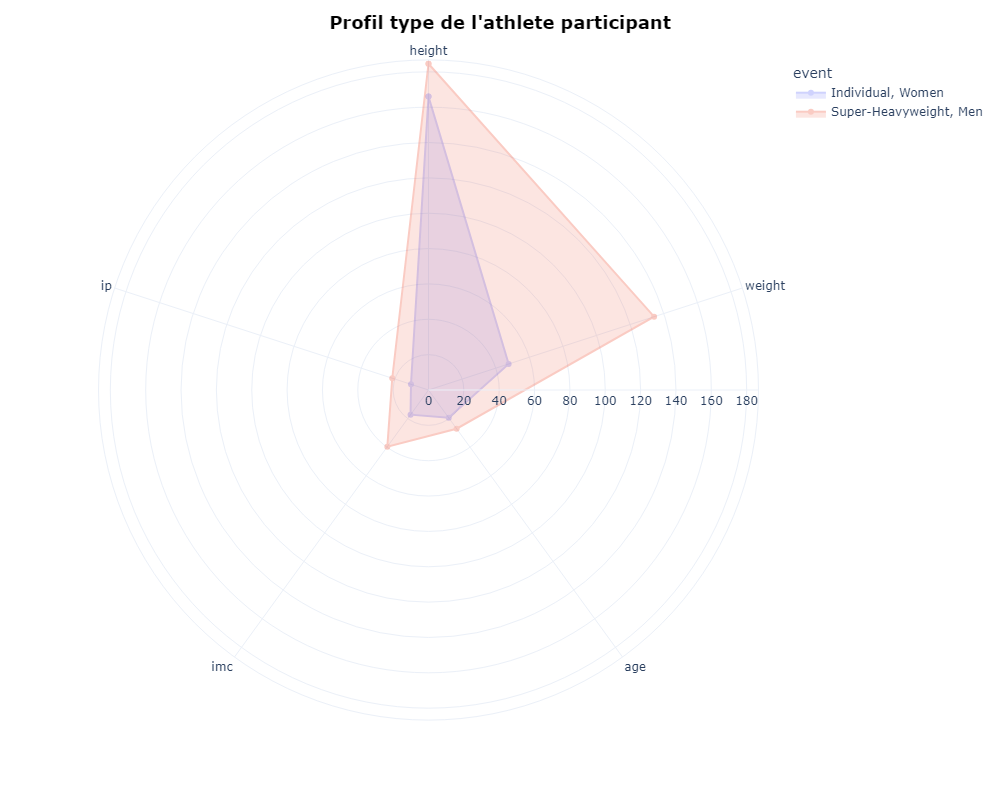

In [58]:
fig = px.line_polar(
    resultat_extremes_long,
    r='valeur',
    theta='attribut',
    color='event',
    line_close=True,
    markers=True,
    template='plotly_white',
    #range_r=[0, 10],  # fixe une échelle commune

)

fig.update_traces(
    fill='toself', 
    opacity=0.3)

fig.update_layout(go.Layout(
    title=go.layout.Title(
        text="<b>Profil type de l'athlete participant</b>",
        x=0.5,
        y=0.98,
        font=dict(
            size = 18,
            color="black"
        )
    )
))

fig.update_layout(
    width=1000,
    height=800
)



fig.show()

In [59]:
resultat_extremes_long.head(4)

,sport_event_id,sport,event,attribut,valeur
0,250,Rhythmic Gymnastics,"Individual, Women",height,165.996212
1,95,Weightlifting,"Super-Heavyweight, Men",height,184.575130
2,250,Rhythmic Gymnastics,"Individual, Women",weight,47.666667
3,95,Weightlifting,"Super-Heavyweight, Men",weight,134.195652


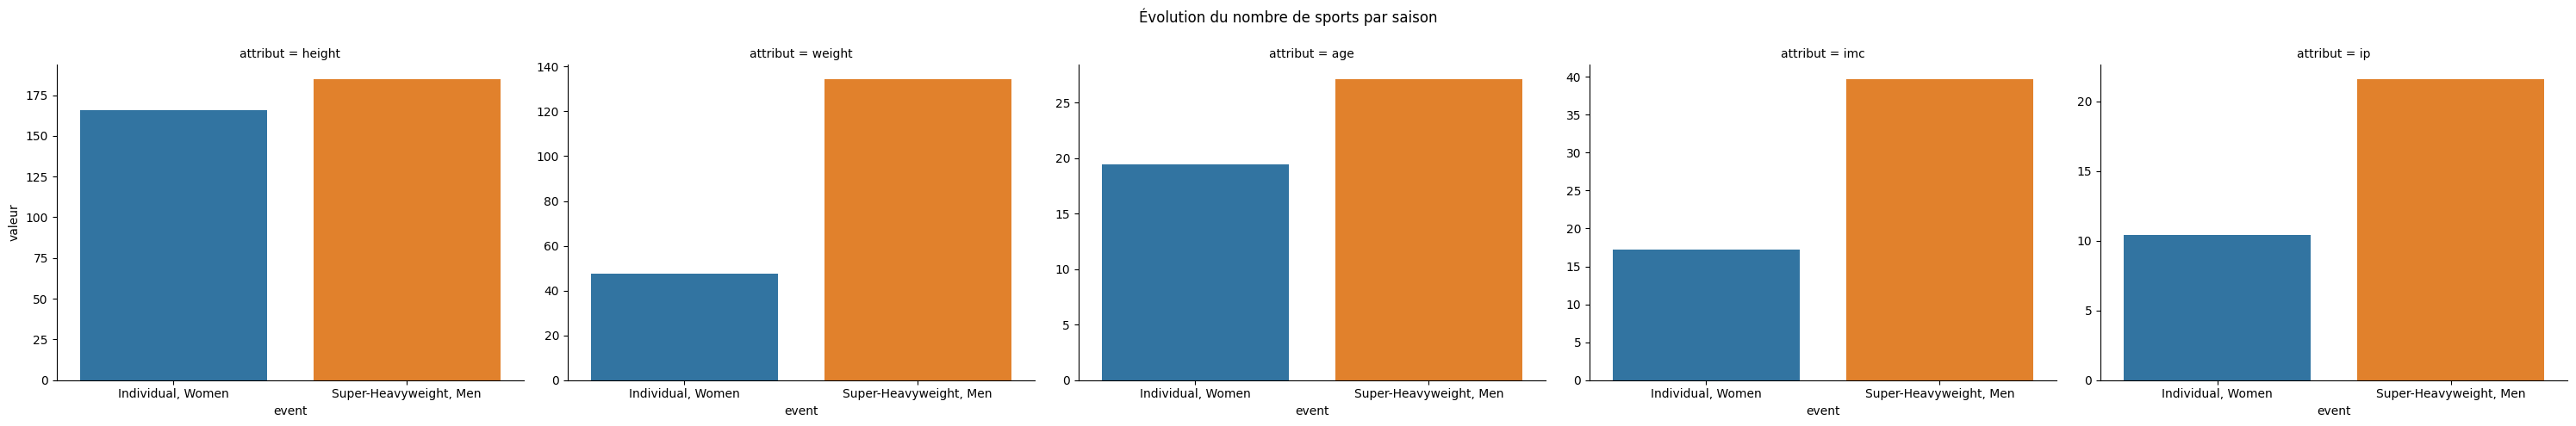

In [60]:
sns.catplot(
    data=resultat_extremes_long,
    x='event', 
    y='valeur', 
    col='attribut', # Crée un graphique par saison
    hue='event', 
    kind='bar', 
    height=5, 
    aspect=1.2,
    sharey = False # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre de sports par saison")
plt.show()

In [61]:
# #NORMALISATON DU DF LONG

# # 1. Calcul des min et max pour chaque attribut (depuis votre profil_type global)
# # Cela permet de garder une base de référence cohérente
# stats_min = profil_type[['height', 'weight', 'age', 'imc', 'ip']].min()
# stats_max = profil_type[['height', 'weight', 'age', 'imc', 'ip']].max()

# # 2. Fonction pour normaliser (score de 0 à 100 pour plus de lisibilité)
# def normalize_row(row):
#     attr = row['attribut']
#     val = row['valeur']
#     return (val - stats_min[attr]) / (stats_max[attr] - stats_min[attr]) * 100

# # 3. On applique la normalisation sur votre DataFrame long
# resultat_extremes_long['valeur_norm'] = resultat_extremes_long.apply(normalize_row, axis=1)

# resultat_extremes_long

In [62]:
# #NORMALISATION DU SPIDER CHART

# fig = px.line_polar(
#     resultat_extremes_long,
#     r='valeur_norm',
#     theta='attribut',
#     color='event',
#     line_close=True,
#     markers=True,
#     template='plotly_white',
#     #range_r=[0, 10],  # fixe une échelle commune

# )

# fig.update_traces(
#     fill='toself', 
#     opacity=0.3)

# fig.update_layout(go.Layout(
#     title=go.layout.Title(
#         text="<b>Profil type de l'athlete participant</b>",
#         x=0.5,
#         y=0.98,
#         font=dict(
#             size = 18,
#             color="black"
#         )
#     )
# ))

# fig.update_layout(
#     width=1000,
#     height=800
# )



# fig.show()

### Les athletes qui ont fait le plus d'olympiades

In [63]:
df_participation = df_athlete_result.groupby(['athlete'])['edition'].nunique().reset_index(name='Nb_Editions_Participées')

In [64]:
df_sport = df_athlete_result[['athlete', 'sport']].drop_duplicates(subset=['athlete'], keep='first')
#df_sport

In [65]:
df_participation = pd.merge(
    df_participation, 
    df_sport, 
    on='athlete', 
    how='left'
)

In [66]:
#top99
df_top_99_assidus = df_participation.sort_values(by='Nb_Editions_Participées', ascending=False).head(99)
print(df_top_99_assidus.head(99))

                   athlete  Nb_Editions_Participées                sport
58755           Ian Millar                       10   Equestrian Jumping
144442   Vladimir Andreyev                        9              Fencing
11939       Antonio García                        9             Football
144614    Vladimir Morozov                        9       Figure Skating
72895           José Ramos                        9            Wrestling
...                    ...                      ...                  ...
10360    Anky van Grunsven                        7  Equestrian Dressage
128100       Segun Toriola                        7         Table Tennis
128653      Sergey Makarov                        7            Athletics
128148     Seiko Hashimoto                        7        Speed Skating
110605  Otryadyn Gündegmaa                        7             Shooting

[99 rows x 3 columns]


## 5. Analyse des pays

### Nombre d'organisation par pays et saison

In [67]:
# On groupe par pays et saison, on compte, puis on pivote les saisons en colonnes
jo_attribution = df_games.groupby(['country_noc', 'season']).size().unstack(fill_value=0)

                    #.size() : Compte le nombre d'occurrences pour chaque combinaison (Pays, Saison).
                    #.unstack(fill_value=0) : C'est l'étape clé. Elle transforme les valeurs de la colonne season (Summer/Winter) en colonnes individuelles. Le fill_value=0 permet de remplacer les NaN par des zéros si un pays n'a fait que l'un ou l'autre.

# On ajoute une colonne Total
jo_attribution['Total'] = jo_attribution.sum(axis=1)

# # On trie par le total
jo_attribution = jo_attribution.sort_values(by='Total', ascending=False).reset_index()

jo_attribution.head(4)

season,country_noc,Other,Summer,Winter,Total
0,USA,0,5,4,9
1,FRA,0,3,3,6
2,ITA,0,1,4,5
3,GBR,0,4,0,4


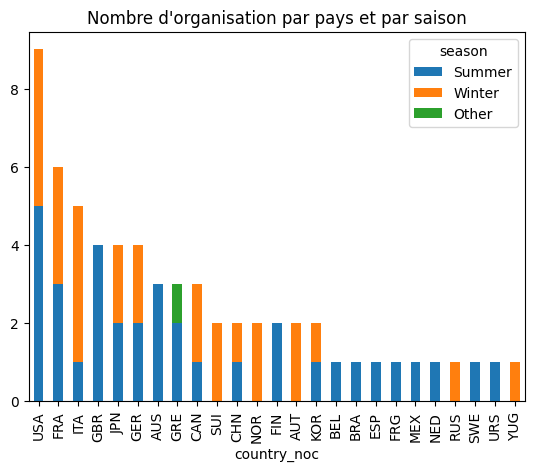

In [68]:
jo_attribution.set_index('country_noc')[['Summer', 'Winter', 'Other']].plot(kind='bar' ,
                                                                            stacked='True')

plt.title("Nombre d'organisation par pays et par saison")
plt.show()

### Nombre d'athletes pour la delegation française

In [69]:
df_bio_result_merged.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men


In [70]:
df_nb_athlete_delegation = df_bio_result_merged.groupby(['year','season','country_noc'])['athlete_id'].nunique().reset_index()
df_nb_athlete_delegation.sample(3)

,year,season,country_noc,athlete_id
679,1956,Winter,HUN,3
971,1968,Summer,ETH,20
269,1932,Summer,AUT,19


In [71]:
pays_target = ['FRA'] 
df_plot = df_nb_athlete_delegation[df_nb_athlete_delegation['country_noc'].isin(pays_target)]
df_plot.head(3)

,year,season,country_noc,athlete_id
4,1896,Summer,FRA,18
21,1900,Summer,FRA,1466
59,1908,Summer,FRA,283


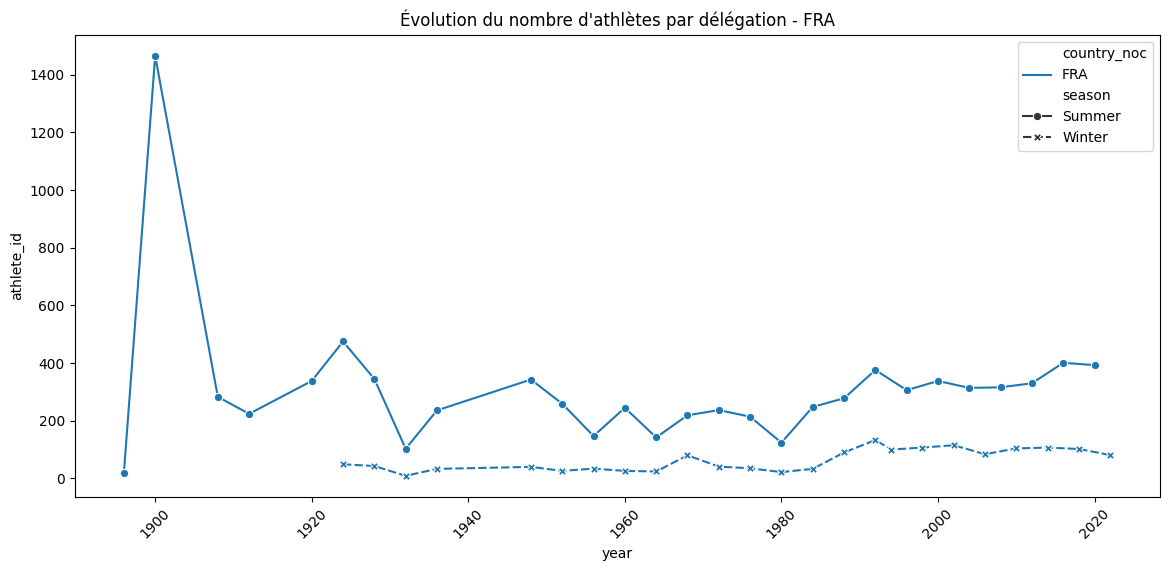

In [72]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_plot, x='year', y='athlete_id', hue='country_noc', style='season', markers=True)
plt.title("Évolution du nombre d'athlètes par délégation - FRA")
plt.xticks(rotation=45)
plt.show()

### Comparatif pour plusieurs délégations

In [73]:
pays_target = ['USA', 'FRA' , 'CHN']
df_plot = df_nb_athlete_delegation[df_nb_athlete_delegation['country_noc'].isin(pays_target)]

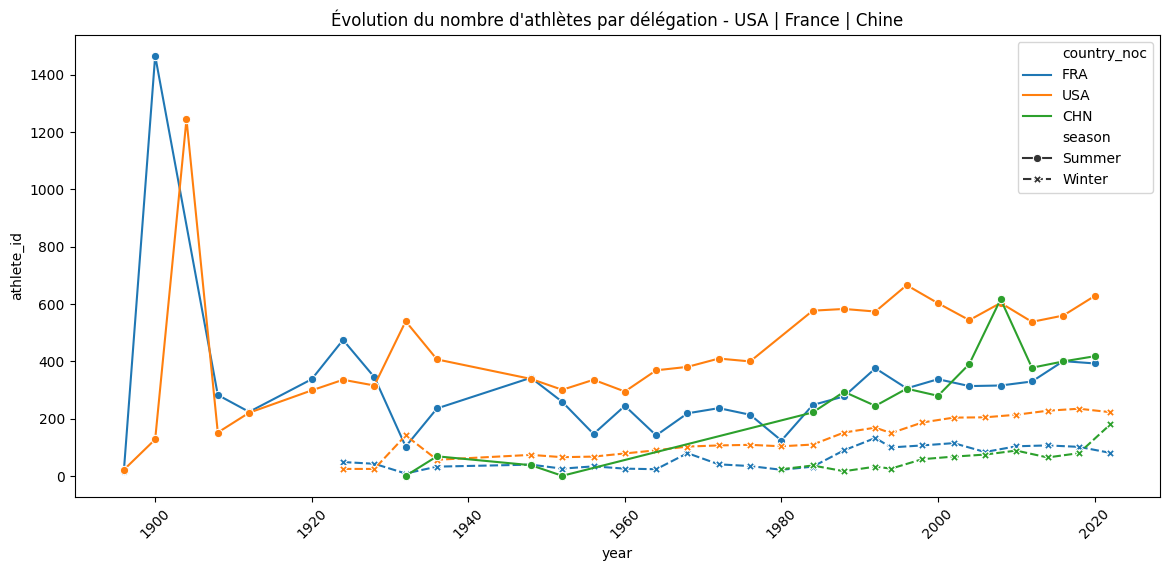

In [74]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_plot,
             x='year', 
             y='athlete_id', 
             hue='country_noc', 
             style='season', 
             markers=True)
plt.title("Évolution du nombre d'athlètes par délégation - USA | France | Chine")
plt.xticks(rotation=45)
plt.show()

## 6. Analyse par sport & épreuve

### L'évolution morphologique des nageurs

<Axes: xlabel='edition_year', ylabel='height'>

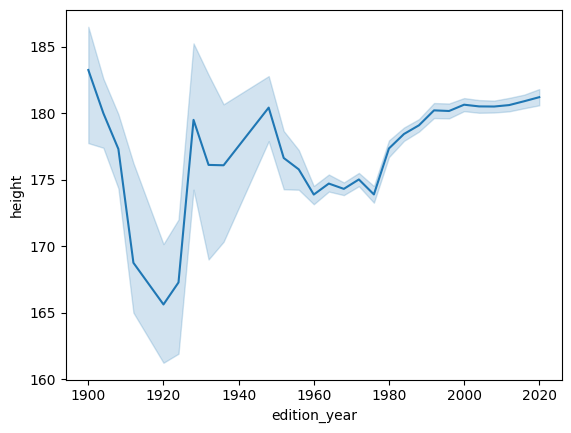

In [75]:
df_swimming = df_bio_result_merged[df_bio_result_merged['sport'] == 'Swimming']

sns.lineplot(
    data = df_swimming,
    x='edition_year',
    y='height'
)

<Axes: xlabel='edition_year', ylabel='weight'>

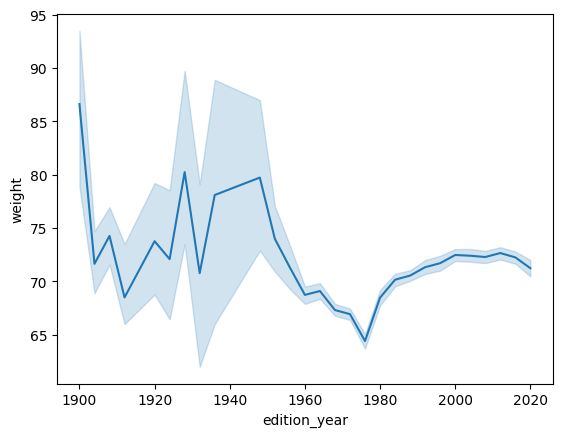

In [76]:
sns.lineplot(
    data = df_swimming,
    x='edition_year',
    y='weight'
)

### Profil type du participant sur un sport_event spécifique

In [77]:
#Je filtre sur mes participants "Male" du sport_event "2"
#Je regarde tous les participants (médaillés ou non)

df_profil_type_all = df_bio_result_merged[
    (df_bio_result_merged['season'].isin(['Summer', 'Winter'])) &
    (df_bio_result_merged['sport_event_id'] == 2) &
    (df_bio_result_merged['sex'] == 'Male')
    ]

df_profil_type_all.sample(3)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
101269,1972 Summer Olympics,18,PER,Athletics,"400 metres, Men",61050,Fernando Acevedo,74476,3 h6 r1/4,NaN,...,175.0,65.0,21.224490,12.128280,Summer,1972,Sport without weight category,Summer,Individual,Men
139599,1992 Summer Olympics,23,GER,Athletics,"400 metres, Men",63996,Rico Lieder,70382,6 h4 r2/4,NaN,...,186.0,67.0,19.366401,10.412043,Summer,1992,Sport without weight category,Summer,Individual,Men
64800,1956 Summer Olympics,14,JAM,Athletics,"400 metres, Men",59287,Mal Spence,72331,6 h2 r3/4,NaN,...,177.0,71.0,22.662709,12.803790,Summer,1956,Sport without weight category,Summer,Individual,Men


In [78]:
profil_type_all = df_profil_type_all.groupby(['sport_event_id','sport' , 'event'])[['height', 'weight',	'age',	'imc',	'ip']].mean().reset_index()
profil_type_all['statut'] = "participant"
profil_type_all

,sport_event_id,sport,event,height,weight,age,imc,ip,statut
0,2,Athletics,"400 metres, Men",179.642342,71.461228,24.184323,22.12286,12.33499,participant


In [79]:
#Je filtre sur mes participants "Male" du sport_event "2"
#Cette fois-ci je ne garde que les médaillés

df_profil_type_medal_only = df_bio_result_merged[
    (df_bio_result_merged['season'].isin(['Summer', 'Winter'])) &
    (df_bio_result_merged['sport_event_id'] == 2) &
    (df_bio_result_merged['sex'] == 'Male') & 
    (df_bio_result_merged['medal'] != "nan")
    ]

df_profil_type_medal_only.sample(3)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
138922,1964 Summer Olympics,16,GER,Athletics,"400 metres, Men",60112,Jörg Jüttner,70323,5 h1 r3/4,NaN,...,183.0,76.0,22.694019,12.401103,Summer,1964,Sport without weight category,Summer,Individual,Men
219800,1972 Summer Olympics,18,ITA,Athletics,"400 metres, Men",61050,Marcello Fiasconaro,923518,DNS,NaN,...,185.0,78.0,22.790358,12.319112,Summer,1972,Sport without weight category,Summer,Individual,Men
105044,1908 Summer Olympics,5,CAN,Athletics,"400 metres, Men",56313,Cal Bricker,65972,DNS,NaN,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men


In [80]:
profil_type = df_profil_type_medal_only.groupby(['sport_event_id','sport' , 'event'])[['height', 'weight',	'age',	'imc',	'ip']].mean().reset_index()
profil_type['statut'] = "médaillé"
profil_type

,sport_event_id,sport,event,height,weight,age,imc,ip,statut
0,2,Athletics,"400 metres, Men",179.642342,71.461228,24.184323,22.12286,12.33499,médaillé


In [81]:
# Je concatène les deux résumés d'une ligne
profil_type_total = pd.concat([profil_type_all, profil_type], ignore_index=True)
profil_type_total

,sport_event_id,sport,event,height,weight,age,imc,ip,statut
0,2,Athletics,"400 metres, Men",179.642342,71.461228,24.184323,22.12286,12.33499,participant
1,2,Athletics,"400 metres, Men",179.642342,71.461228,24.184323,22.12286,12.33499,médaillé


<Axes: >

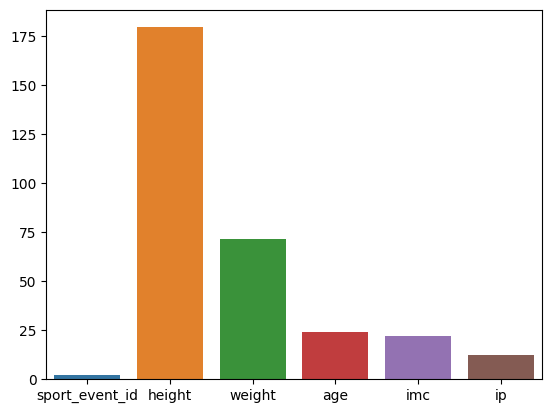

In [82]:
sns.barplot(data=profil_type_total,
            )

In [83]:
# Je transforme en tableau long

profil_type_total_long = profil_type_total.melt(
    id_vars=['statut','sport_event_id','sport','event'],
    value_vars=['height', 'weight',	'age',	'imc',	'ip'],
    var_name='attribut',
    value_name='valeur'
)

profil_type_total_long.head(4)

,statut,sport_event_id,sport,event,attribut,valeur
0,participant,2,Athletics,"400 metres, Men",height,179.642342
1,médaillé,2,Athletics,"400 metres, Men",height,179.642342
2,participant,2,Athletics,"400 metres, Men",weight,71.461228
3,médaillé,2,Athletics,"400 metres, Men",weight,71.461228


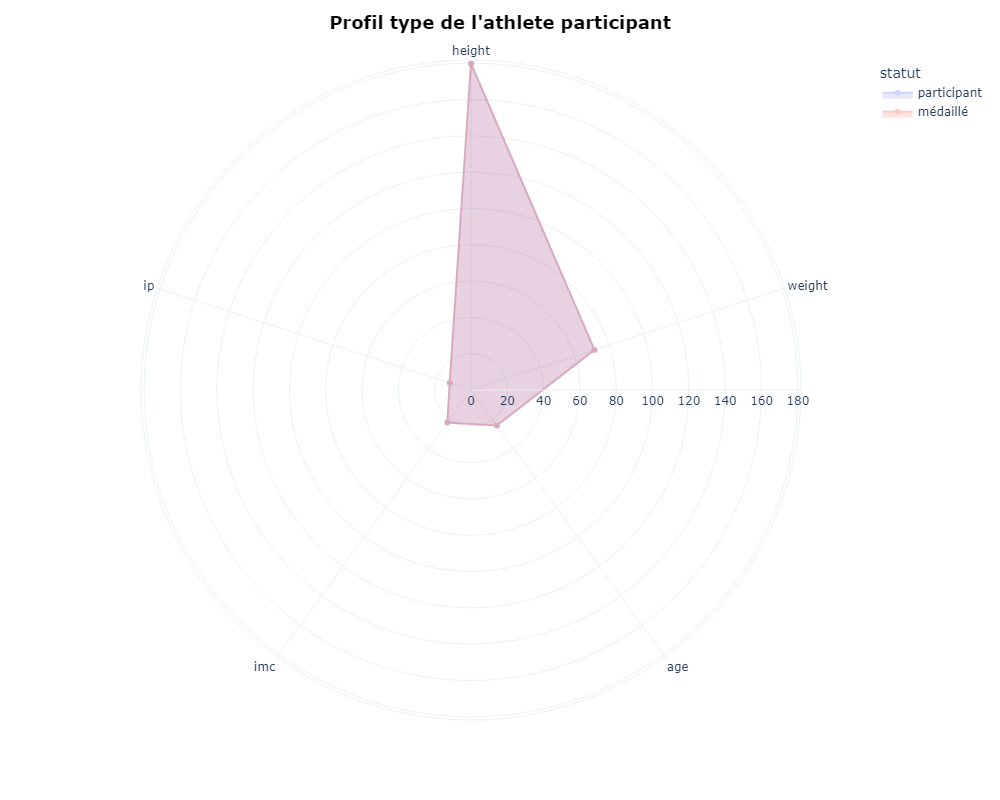

In [84]:
fig = px.line_polar(
    profil_type_total_long,
    r='valeur',
    theta='attribut',
    color='statut',
    line_close=True,
    markers=True,
    template='plotly_white',
    #range_r=[0, 10],  # fixe une échelle commune

)

fig.update_traces(
    fill='toself', 
    opacity=0.3)

fig.update_layout(go.Layout(
    title=go.layout.Title(
        text="<b>Profil type de l'athlete participant</b>",
        x=0.5,
        y=0.98,
        font=dict(
            size = 18,
            color="black"
        )
    )
))

fig.update_layout(
    width=1000,
    height=800
)



fig.show()

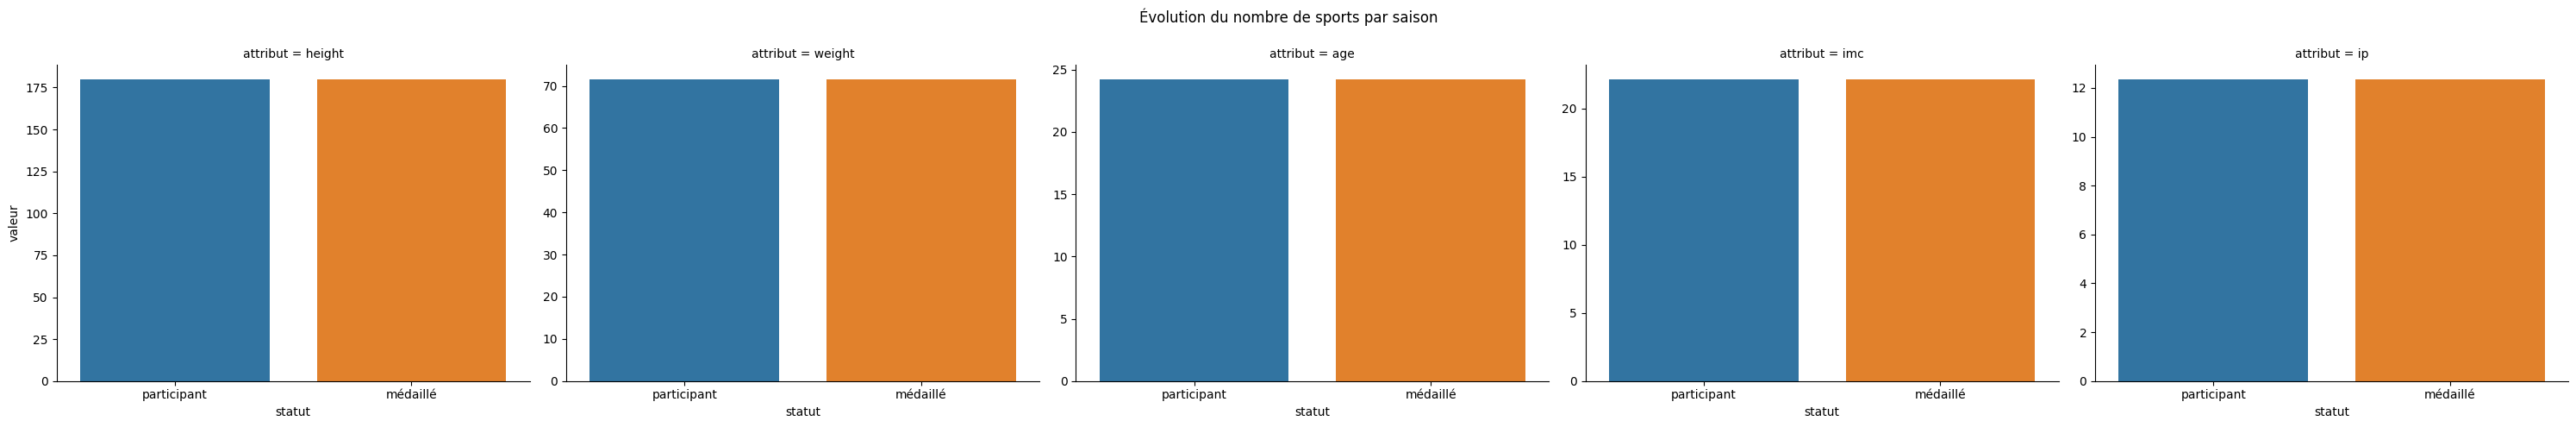

In [85]:
sns.catplot(
    data=profil_type_total_long,
    x='statut', 
    y='valeur', 
    col='attribut', # Crée un graphique par saison
    hue='statut', 
    kind='bar', 
    height=5, 
    aspect=1.2,
    sharey = False # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre de sports par saison")
plt.show()

### Fréquence des sports dans le top 50 des participations 

In [86]:
repartition_sports_top_99 = df_top_99_assidus['sport'].value_counts()

In [87]:
print("--- Répartition des Sports parmi les 50 Athlètes les plus Assidus ---")
print(repartition_sports_top_99)
print("---------------------------------------------------------------------")

--- Répartition des Sports parmi les 50 Athlètes les plus Assidus ---
sport
Shooting                 16
Sailing                   8
Athletics                 8
Fencing                   7
Equestrian Jumping        7
Rowing                    6
Equestrian Eventing       6
Table Tennis              6
Ski Jumping               4
Weightlifting             4
Artistic Gymnastics       3
Football                  3
Hockey                    2
Speed Skating             2
Figure Skating            1
Bobsleigh                 1
Cycling Mountain Bike     1
Wrestling                 1
Canoe Marathon            1
Luge                      1
Tennis                    1
Canoe Sprint              1
Archery                   1
Volleyball                1
Boxing                    1
Swimming                  1
Basketball                1
Judo                      1
Cycling Track             1
Cross Country Skiing      1
Equestrian Dressage       1
Name: count, dtype: int64
------------------------------

In [88]:
print("\nRépartition en Pourcentage :")
repartition_sports_top_99_pct = df_top_99_assidus['sport'].value_counts(normalize=True) * 100
print(repartition_sports_top_99_pct.round(1).astype(str) + '%')


Répartition en Pourcentage :
sport
Shooting                 16.2%
Sailing                   8.1%
Athletics                 8.1%
Fencing                   7.1%
Equestrian Jumping        7.1%
Rowing                    6.1%
Equestrian Eventing       6.1%
Table Tennis              6.1%
Ski Jumping               4.0%
Weightlifting             4.0%
Artistic Gymnastics       3.0%
Football                  3.0%
Hockey                    2.0%
Speed Skating             2.0%
Figure Skating            1.0%
Bobsleigh                 1.0%
Cycling Mountain Bike     1.0%
Wrestling                 1.0%
Canoe Marathon            1.0%
Luge                      1.0%
Tennis                    1.0%
Canoe Sprint              1.0%
Archery                   1.0%
Volleyball                1.0%
Boxing                    1.0%
Swimming                  1.0%
Basketball                1.0%
Judo                      1.0%
Cycling Track             1.0%
Cross Country Skiing      1.0%
Equestrian Dressage       1.0%
Nam

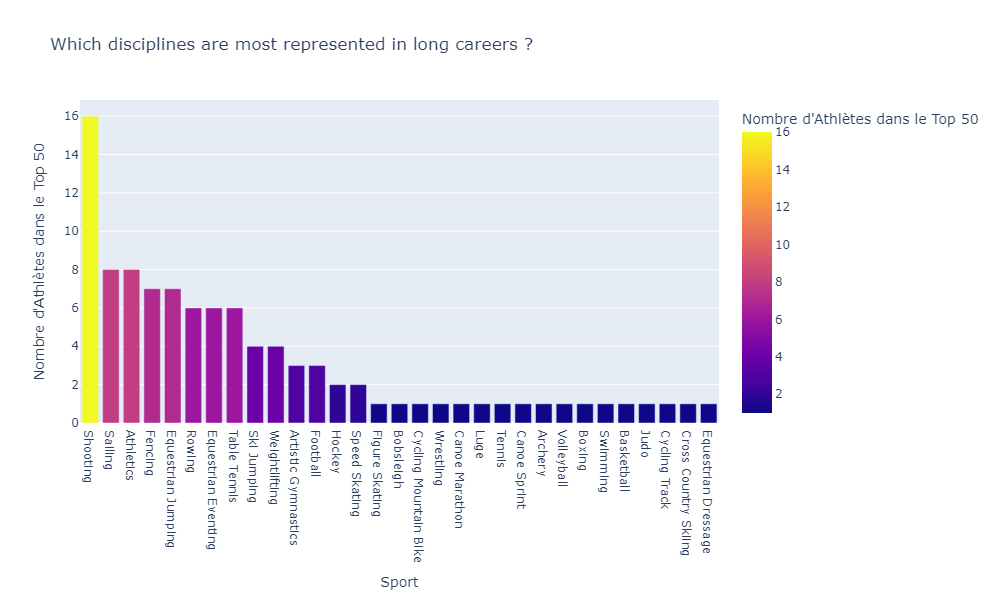

In [89]:
fig = px.bar(
    repartition_sports_top_99.reset_index(),
    x='sport',                         # Les sports sur l'axe X
    y='count',                         # Le nombre d'athlètes (compte) sur l'axe Y
    title="Which disciplines are most represented in long careers ?",
    labels={'sport': 'Sport', 'count': "Nombre d'Athlètes dans le Top 50"},
    color='count',
    color_continuous_scale=px.colors.sequential.Plasma # Utilisation d'une palette de couleurs
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'}, # Trier les barres de la plus haute à la plus basse
    width=1000,
    height=600
)

fig.show()

## 7. Corrélations entre les facteurs ?

In [90]:
df_bio.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc,imc,ip,born_year
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.0,Bulgaria,BUL,19.959355,12.023708,1949.0
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.0,Russian Federation,RUS,20.675803,11.236850,1977.0


In [91]:
df_athlete_result.tail(2)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition,sport_event_id,sport_id
315624,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,NaN,1985.0,2022.0,37.0,CHN,False,778,22
315625,2022 Winter Olympics,62,UKR,Bobsleigh,"Monobob, Women",19019671,Lidiya Hunko,149047,20,NaN,1993.0,2022.0,29.0,CHN,False,778,22


In [92]:
df_athlete_result['medal'].value_counts(dropna=False)

medal
NaN       270940
Gold       15072
Bronze     14938
Silver     14676
Name: count, dtype: int64

In [93]:
df_athlete_result['home_country_edition'].value_counts(dropna=False)

home_country_edition
False    288595
True      27031
Name: count, dtype: int64

In [94]:
df_athletes_features = df_bio[['athlete_id', 'sex', 'height', 'weight']]

In [95]:
df_athlete = df_athlete_result [['athlete_id', 'medal', 'age', 'home_country_edition']]

In [96]:
df_athlete.head(1)

,athlete_id,medal,age,home_country_edition
0,64710,NaN,19.0,False


In [97]:
df_merged = pd.merge(left=df_athletes_features,
                     right=df_athlete,
                     on = 'athlete_id',
                     how = 'left') 

In [98]:
df_merged.tail()

,athlete_id,sex,height,weight,medal,age,home_country_edition
315614,74003,Male,188.0,79.0,NaN,23.0,False
315615,74003,Male,188.0,79.0,NaN,27.0,False
315616,74003,Male,188.0,79.0,NaN,27.0,False
315617,74003,Male,188.0,79.0,NaN,31.0,False
315618,74003,Male,188.0,79.0,Gold,31.0,False


In [99]:
df_merged['home_country_edition'].value_counts(dropna=False)

home_country_edition
False    288590
True      27029
Name: count, dtype: int64

In [100]:
#encoder pour faire correlation - sex - medal - home_country_edition

df_merged['sex'] = df_merged['sex'].map({'Male' : 0, 'Female' : 1})
df_merged['medal'] = df_merged['medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1}).fillna(0)
df_merged['home_country_edition'] = df_merged['home_country_edition'].fillna(False).astype('int')


In [101]:
df_merged['medal'].value_counts(dropna=False)

medal
0.0    270934
1.0     44685
Name: count, dtype: int64

In [102]:
df_merged['home_country_edition'].value_counts(dropna=False)

home_country_edition
0    288590
1     27029
Name: count, dtype: int64

In [103]:
features = ['age', 'weight', 'height','sex', 'home_country_edition']

In [104]:
corr  =df_merged[features + ['medal']].corr()

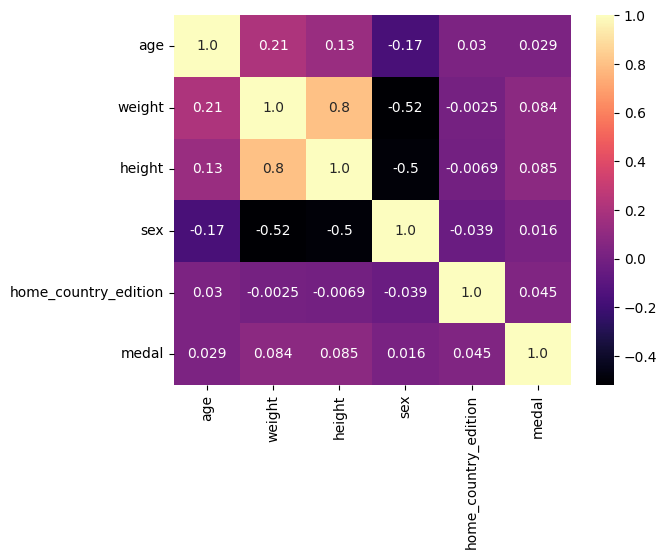

In [105]:
sns.heatmap(corr,
            annot=True,
            cmap= 'magma',
            fmt=".2")

plt.show()

## 8. Dopage

### Evolution du dopage par genre dans le temps

In [106]:
# Rajout d'une colonne year en fonction de l'édition

df_dopage_athlete["year"] = (
    df_dopage_athlete["olympics"]
    .str.extract(r"(\d{4})")
    .astype(int)
)

<Axes: title={'center': 'Évolution du nombre de cas de dopage aux Jeux Olympiques'}, xlabel='Année', ylabel='Nombre de cas'>

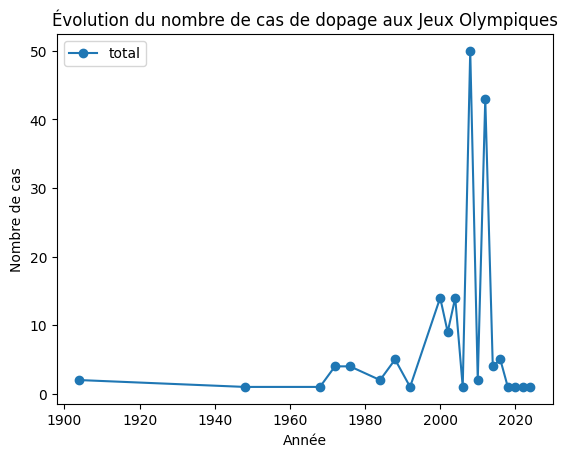

In [107]:
# Mise en forme du graphique

df_time = (
    df_dopage_athlete
    .groupby("year", as_index=False)
    .size()
    .rename(columns={"size": "total"})
    .sort_values("year")
)

df_time.plot(
    x="year",
    y="total",
    kind="line",
    marker="o",
    title="Évolution du nombre de cas de dopage aux Jeux Olympiques",
    xlabel="Année",
    ylabel="Nombre de cas"
)

### Distribution de l'âge des dopés

<Axes: ylabel='Frequency'>

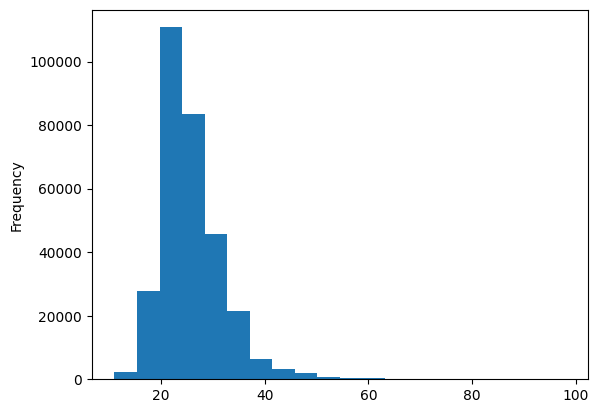

In [108]:
df_athlete["age"].dropna().plot(kind="hist", bins=20)


### Top 15 des sports les plus touchés par le dopage

<Axes: title={'center': 'Top 15 des sports les plus touchés par le dopage'}, xlabel='sport'>

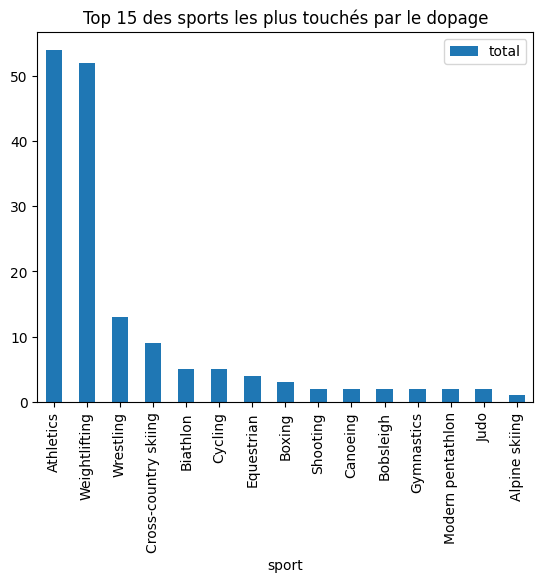

In [109]:
(
    df_dopage_sport
    .loc[df_dopage_sport["sport"] != "Total"]   # ⬅️ suppression de la ligne parasite
    .groupby("sport", as_index=False)["total"]
    .sum()
    .sort_values("total", ascending=False)
    .head(15)
    .plot(
        x="sport",
        y="total",
        kind="bar",
        title="Top 15 des sports les plus touchés par le dopage"
    )
)


### Répartition du dopage par genre

<Axes: title={'center': 'Répartition des cas de dopage par genre (en %)'}, xlabel='gender', ylabel='Pourcentage (%)'>

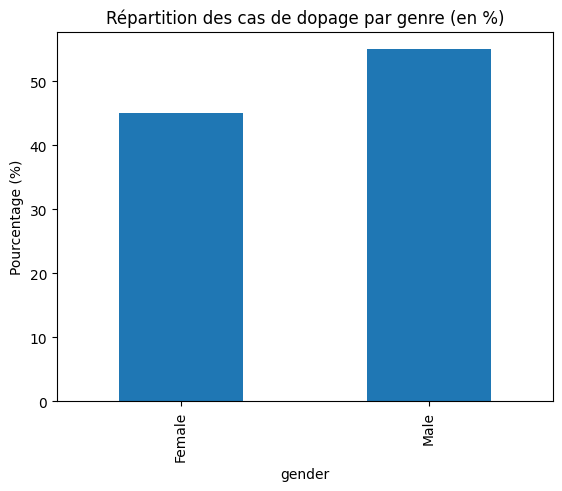

In [110]:
df_gender_clean = df_dopage_gender[
    df_dopage_gender["gender"].str.lower() != "total"
]

df_gender_pct = (
    df_gender_clean
    .groupby("gender", as_index=False)["total"]
    .sum()
)

df_gender_pct["percentage"] = (
    df_gender_pct["total"] / df_gender_pct["total"].sum() * 100
)

df_gender_pct.plot(
    x="gender",
    y="percentage",
    kind="bar",
    title="Répartition des cas de dopage par genre (en %)",
    ylabel="Pourcentage (%)",
    legend=False
)
